<a href="https://colab.research.google.com/github/sethkipsangmutuba/Probability/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Probability and Information Theory**  

Probability theory is a mathematical tool for handling uncertainty. It helps in reasoning under uncertainty and is widely used in AI and data science. AI systems rely on probability for making predictions and analyzing models.  

Information theory, on the other hand, measures uncertainty in probability distributions. It helps in data compression and communication.  


## **Why Probability?**  

Unlike traditional computer science, which deals with deterministic processes, machine learning often involves uncertainty. This uncertainty arises from:  

1. **Inherent randomness** – Some processes, like quantum mechanics or random shuffling in a game, are truly probabilistic.  
2. **Incomplete observability** – Even deterministic systems appear uncertain if not all variables are observed (e.g., the Monty Hall problem).  
3. **Incomplete modeling** – Simplifying a system for practical reasons can introduce uncertainty (e.g., discretizing space in a robot's model).  

Probability theory helps AI systems reason under uncertainty. It provides tools for modeling both **frequentist probability** (event frequency in repeated trials) and **Bayesian probability** (degree of belief in an outcome).  

Ultimately, probability theory extends logic to handle uncertainty, making it fundamental in AI and data science.  


## **Random Variables**  

A **random variable** is a variable that takes on values randomly. It is typically denoted by a lowercase letter (e.g., *x*), while its possible values are written in a different style (e.g., *x₁, x₂*).  

Random variables must be paired with a **probability distribution**, which defines the likelihood of each possible value.  

There are two main types of random variables:  

1. **Discrete Random Variables** – Take on a finite or countably infinite number of values. These values can be numbers or categorical states (e.g., "rainy" or "sunny").  
2. **Continuous Random Variables** – Take on real-valued numbers, such as heights, temperatures, or probabilities.  

Random variables are fundamental in probability theory and machine learning, helping to model uncertainty in data.  


## **Probability Distributions**  

A **probability distribution** describes the likelihood of a random variable taking on each of its possible values. The way we define probability distributions depends on whether the variable is **discrete** or **continuous**.  

### **Discrete Variables and Probability Mass Functions (PMF)**  
For **discrete random variables**, we use a **probability mass function (PMF)**, denoted as $P(x)$, which gives the probability of a variable $x$ taking on a specific value.  

A valid PMF must satisfy:  
- $ 0 \leq P(x) \leq 1 $ for all possible values of $x$.  
- The sum of all probabilities must be 1:  
  $$
  \sum_{x \in X} P(x) = 1
  $$  

For example, if a variable $x$ can take on $k$ equally likely values, its PMF follows a **uniform distribution**:  
  $$
  P(x = x_i) = \frac{1}{k}
  $$    


In [73]:
import random
import numpy as np
import scipy.stats as stats

# Discrete Probability Distribution using a PMF
def discrete_pmf(values, probabilities):
    """Returns a random sample based on given discrete probability mass function."""
    return random.choices(values, weights=probabilities, k=1)[0]

# Example discrete distribution: Rolling a biased die
values = [1, 2, 3, 4, 5, 6]
probabilities = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]  # Must sum to 1

random_sample = discrete_pmf(values, probabilities)
print(f"Random sample from discrete distribution: {random_sample}")

Random sample from discrete distribution: 3


### **Continuous Variables and Probability Density Functions (PDF)**  
For **continuous random variables**, we use a **probability density function (PDF)**, denoted as $p(x)$. Unlike a PMF, a PDF does not give the probability of a specific value directly but describes the probability of $x$ falling within an interval.  

A valid PDF must satisfy:  
- $ p(x) \geq 0 $ for all $x$.  
- The total probability integrates to 1:  
  $$
  \int p(x)dx = 1
  $$  

For example, a **uniform distribution** over an interval $[a, b]$ has a constant PDF:  
  $$
  u(x; a, b) =
  \begin{cases}
  \frac{1}{b-a}, & \text{if } a \leq x \leq b  \\
  0, & \text{otherwise}
  \end{cases}
  $$  

Probability distributions are fundamental in statistics and machine learning, helping to model randomness and uncertainty in data.

In [74]:
# Continuous Probability Distribution using a PDF
def continuous_pdf(x, a, b):
    """Returns the probability density of x for a uniform distribution U(a, b)."""
    if a <= x <= b:
        return 1 / (b - a)
    else:
        return 0

# Example continuous distribution: Uniform in range [0, 1]
a, b = 0, 1
x = np.linspace(-0.5, 1.5, 100)  # Values for plotting
pdf_values = [continuous_pdf(i, a, b) for i in x]

# Using scipy to generate random samples
uniform_samples = stats.uniform.rvs(a, b - a, size=5)
print(f"Random samples from uniform distribution: {uniform_samples}")


Random samples from uniform distribution: [0.50885165 0.29797455 0.1591602  0.83014337 0.97149206]


## **3.4 Marginal Probability**

Sometimes, we know the probability distribution over a set of variables and want to determine the probability distribution over just a subset of them. The probability distribution over the subset is known as the **marginal probability distribution**.

For example, suppose we have discrete random variables $x$ and $y$, and we know $P(x, y)$. We can find $P(x)$ using the **sum rule**:

$$
\forall x \in X, \quad P(x = x) = \sum_{y} P(x = x, y = y)
$$

The term **marginal probability** originates from traditional calculations where values of $P(x, y)$ are arranged in a table. Summing across a row provides $P(x)$, which is written in the **margin** of the table.

For **continuous** variables, we use **integration** instead of summation:

$$
p(x) = \int p(x, y) \, dy
$$


In [75]:
import numpy as np
from scipy.integrate import quad

# Discrete Case: Summing Out a Variable
def marginal_probability_discrete(joint_prob_matrix):
    """
    Computes the marginal probability P(x) by summing over all values of y.

    Parameters:
    joint_prob_matrix (numpy.ndarray): 2D array where P(x, y) is stored.

    Returns:
    numpy.ndarray: Marginal probability P(x)
    """
    return np.sum(joint_prob_matrix, axis=1)  # Summing over y (axis=1)

# Example: Discrete joint probability matrix P(x, y)
joint_prob = np.array([[0.1, 0.2],  # P(x=1, y=1), P(x=1, y=2)
                       [0.3, 0.4]])  # P(x=2, y=1), P(x=2, y=2)

marginal_x = marginal_probability_discrete(joint_prob)
print("Marginal Probability P(x):", marginal_x)

# Continuous Case: Integrating Out a Variable
def joint_pdf(x, y):
    """Example joint probability density function p(x, y)."""
    return np.exp(-x - y)  # Example: Exponential decay function

def marginal_probability_continuous(x):
    """
    Computes the marginal probability p(x) by integrating out y.

    Parameters:
    x (float): Given value of x

    Returns:
    float: Marginal probability p(x)
    """
    return quad(lambda y: joint_pdf(x, y), 0, np.inf)[0]  # Integrate over y from 0 to infinity

# Example: Compute marginal probability for x=1
marginal_x_cont = marginal_probability_continuous(1)
print("Marginal Probability p(x=1):", marginal_x_cont)


Marginal Probability P(x): [0.3 0.7]
Marginal Probability p(x=1): 0.3678794411714423


## 3.5 Conditional Probability

In many cases, we are interested in the probability of some event, given that some other event has happened. This is called a **conditional probability**. We denote the conditional probability that $y = y$ given $x = x$ as $P(y = y | x = x)$. This conditional probability can be computed with the formula:

$$
P(y = y | x = x) = \frac{P(y = y, x = x)}{P(x = x)} \tag{3.5}
$$

The conditional probability is only defined when $P(x = x) > 0$. We cannot compute the conditional probability conditioned on an event that never happens.

It is important not to confuse conditional probability with computing what would happen if some action were undertaken. For example, the conditional probability that a person is from Germany given that they speak German is quite high, but if a randomly selected person is taught to speak German, their country of origin does not change.

Computing the consequences of an action is called making an **intervention query**. Intervention queries are the domain of **causal modeling**, which we do not explore in this book.


In [76]:
import numpy as np

# Sample data: Joint probability P(x, y)
# P(x=1, y=1), P(x=1, y=0), P(x=0, y=1), P(x=0, y=0)
P_xy = np.array([[0.2, 0.1],  # P(x=1, y=1), P(x=1, y=0)
                 [0.3, 0.4]])  # P(x=0, y=1), P(x=0, y=0)

# Marginal probability P(x)
P_x = np.sum(P_xy, axis=1)  # Sum over y

# Conditional Probability P(y | x) = P(x, y) / P(x)
# We are calculating P(y=1 | x=1), P(y=0 | x=1), etc.
P_y_given_x = P_xy / P_x[:, None]

print("Joint Probability P(x, y):\n", P_xy)
print("\nMarginal Probability P(x):\n", P_x)
print("\nConditional Probability P(y | x):\n", P_y_given_x)


Joint Probability P(x, y):
 [[0.2 0.1]
 [0.3 0.4]]

Marginal Probability P(x):
 [0.3 0.7]

Conditional Probability P(y | x):
 [[0.66666667 0.33333333]
 [0.42857143 0.57142857]]


## 3.6 The Chain Rule of Conditional Probabilities

Any joint probability distribution over many random variables may be decomposed into conditional distributions over only one variable:

$$
P(x^{(1)}, \dots, x^{(n)}) = P(x^{(1)}) \prod_{i=2}^{n} P(x^{(i)} | x^{(1)}, \dots, x^{(i-1)}). \tag{3.6}
$$

This observation is known as the **chain rule** or **product rule** of probability. It follows immediately from the definition of conditional probability in equation (3.5).

For example, applying the definition twice, we get:

$$
P(a, b, c) = P(a | b, c) P(b, c)
$$

Now, we can decompose $P(b, c)$ further as:

$$
P(b, c) = P(b | c) P(c)
$$

Thus, we get the following chain rule:

$$
P(a, b, c) = P(a | b, c) P(b | c) P(c).
$$


In [77]:
import numpy as np

# Example conditional probabilities (these are just random values for illustration)
def P_a_given_b_c(b, c):
    # Example: P(a | b, c) = 0.6 for certain combinations of b and c
    return 0.6 if b == 1 and c == 1 else 0.4

def P_b_given_c(c):
    # Example: P(b | c) = 0.7 for c = 1, and 0.3 for c = 0
    return 0.7 if c == 1 else 0.3

def P_c():
    # Example: P(c) = 0.5 (uniform probability for simplicity)
    return 0.5

# Define values for b and c
b_values = [0, 1]  # Example values for b
c_values = [0, 1]  # Example values for c

# Calculate joint probability P(a, b, c) using the chain rule
def joint_probability(a, b, c):
    P_a_b_c = P_a_given_b_c(b, c) * P_b_given_c(c) * P_c()
    return P_a_b_c

# Loop through all possible combinations of a, b, c
for a in [0, 1]:  # Example values for a
    for b in b_values:
        for c in c_values:
            prob = joint_probability(a, b, c)
            print(f"P(a={a}, b={b}, c={c}) = {prob:.4f}")


P(a=0, b=0, c=0) = 0.0600
P(a=0, b=0, c=1) = 0.1400
P(a=0, b=1, c=0) = 0.0600
P(a=0, b=1, c=1) = 0.2100
P(a=1, b=0, c=0) = 0.0600
P(a=1, b=0, c=1) = 0.1400
P(a=1, b=1, c=0) = 0.0600
P(a=1, b=1, c=1) = 0.2100


# 3.7 Independence and Conditional Independence

Two random variables $x$ and $y$ are **independent** if their probability distribution can be expressed as a product of two factors, one involving only $x$ and one involving only $y$:

$$
\forall x \in X, y \in Y, \, p(x = x, y = y) = p(x = x) p(y = y). \tag{3.7}
$$

This equation states that the joint probability distribution of $x$ and $y$ factorizes into the product of the marginal probability distributions of $x$ and $y$.

Two random variables $x$ and $y$ are **conditionally independent** given a random variable $z$ if the conditional probability distribution over $x$ and $y$ factorizes in this way for every value of $z$:

$$
\forall x \in X, y \in Y, z \in Z, \, p(x = x, y = y | z = z) = p(x = x | z = z) p(y = y | z = z). \tag{3.8}
$$

In other words, given the value of $z$, the conditional probability of $x$ and $y$ factorizes into the product of their individual conditional probabilities.

We can denote **independence** and **conditional independence** with compact notation:
- $x \perp y$ means that $x$ and $y$ are independent.
- $x \perp y \, | \, z$ means that $x$ and $y$ are conditionally independent given $z$.


In [78]:
import numpy as np

# Sample space and joint probability distribution
X = np.array([0, 1])  # Random variable X
Y = np.array([0, 1])  # Random variable Y
Z = np.array([0, 1])  # Random variable Z

# Joint Probability Distribution P(x, y)
P_xy = np.array([[0.1, 0.2],  # P(x=0, y=0), P(x=0, y=1)
                 [0.3, 0.4]]) # P(x=1, y=0), P(x=1, y=1)

# Marginal Probability Distribution P(x)
P_x = P_xy.sum(axis=1)

# Marginal Probability Distribution P(y)
P_y = P_xy.sum(axis=0)

# Conditional Probability P(x | y)
def conditional_probability(P_joint, P_marginal, axis):
    return P_joint / P_marginal

# Check for independence: P(x, y) == P(x) * P(y)
def check_independence(P_xy, P_x, P_y):
    for i in range(len(P_x)):
        for j in range(len(P_y)):
            if not np.isclose(P_xy[i][j], P_x[i] * P_y[j]):
                return False
    return True

# Check for conditional independence: P(x, y | z) = P(x | z) * P(y | z)
def check_conditional_independence(P_xy, P_x_given_z, P_y_given_z):
    for i in range(len(P_x_given_z)):
        for j in range(len(P_y_given_z)):
            if not np.isclose(P_xy[i][j], P_x_given_z[i] * P_y_given_z[j]):
                return False
    return True

# Conditional Probability P(x | y)
P_x_given_y = conditional_probability(P_xy, P_y, axis=1)

# Conditional Probability P(y | x)
P_y_given_x = conditional_probability(P_xy.T, P_x, axis=1)

# Example of checking for independence
independence_result = check_independence(P_xy, P_x, P_y)
print("Are X and Y independent? ", independence_result)

# Example of checking for conditional independence (assuming conditional probabilities are computed)
P_xy_given_z = np.array([[0.05, 0.1], [0.15, 0.2]])  # Example conditional joint distribution P(x, y | z)
P_x_given_z = np.array([0.1, 0.2])  # Example conditional distribution P(x | z)
P_y_given_z = np.array([0.1, 0.3])  # Example conditional distribution P(y | z)

conditional_independence_result = check_conditional_independence(P_xy_given_z, P_x_given_z, P_y_given_z)
print("Are X and Y conditionally independent given Z? ", conditional_independence_result)


Are X and Y independent?  False
Are X and Y conditionally independent given Z?  False


# 3.8 Expectation, Variance, and Covariance

The **expectation** or expected value of a function $f(x)$ with respect to a probability distribution $P(x)$ is the average or mean value that $f$ takes on when $x$ is drawn from $P$.

### For Discrete Variables:
The expectation can be computed with a summation:

$$
\mathbb{E}_{x \sim P}[f(x)] = \sum_{x} P(x) f(x) \tag{3.9}
$$

### For Continuous Variables:
The expectation is computed with an integral:

$$
\mathbb{E}_{x \sim p}[f(x)] = \int p(x) f(x) \, dx \tag{3.10}
$$

When the identity of the distribution is clear from the context, we may simply write the name of the random variable that the expectation is over, as in $\mathbb{E}_x[f(x)]$. If it is clear which random variable the expectation is over, we may omit the subscript entirely, as in $\mathbb{E}[f(x)]$. By default, we assume that $\mathbb{E}[\cdot]$ averages over the values of all the random variables inside the brackets. Likewise, when there is no ambiguity, we may omit the square brackets.

Expectations are **linear**, for example:

$$
\mathbb{E}_x[\alpha f(x) + \beta g(x)] = \alpha \mathbb{E}_x[f(x)] + \beta \mathbb{E}_x[g(x)] \tag{3.11}
$$

when $\alpha$ and $\beta$ are not dependent on $x$.

### Variance
The **variance** gives a measure of how much the values of a function of a random variable $x$ vary as we sample different values of $x$ from its probability distribution:

$$
\text{Var}(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] \tag{3.12}
$$

When the variance is low, the values of $f(x)$ cluster near their expected value. The square root of the variance is known as the **standard deviation**.

### Covariance
The **covariance** gives some sense of how much two values are linearly related to each other, as well as the scale of these variables:

$$
\text{Cov}(f(x), g(y)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])(g(y) - \mathbb{E}[g(y)])] \tag{3.13}
$$

High absolute values of the covariance mean that the values change very much and are both far from their respective means at the same time. If the sign of the covariance is positive, then both variables tend to take on relatively high values simultaneously. If the sign of the covariance is negative, then one variable tends to take on a relatively high value at the times that the other takes on a relatively low value, and vice versa. Other measures such as **correlation** normalize the contribution of each variable in order to measure only how much the variables are related, rather than also being affected by the scale of the separate variables.

### Covariance and Independence
The notions of **covariance** and **dependence** are related but distinct concepts. They are related because two variables that are independent have zero covariance, and two variables that have non-zero covariance are dependent. However, **independence** is a distinct property from covariance. For two variables to have zero covariance, there must be no linear dependence between them. **Independence** is a stronger requirement than zero covariance because independence also excludes nonlinear relationships. It is possible for two variables to be dependent but have zero covariance.

#### Example of Zero Covariance but Dependence:
Suppose we first sample a real number $x$ from a uniform distribution over the interval $[-1, 1]$. We next sample a random variable $s$. With probability $\frac{1}{2}$, we choose the value of $s$ to be $1$. Otherwise, we choose the value of $s$ to be $-1$. We can then generate a random variable $y$ by assigning $y = s \cdot x$. Clearly, $x$ and $y$ are not independent, because $x$ completely determines the magnitude of $y$. However,

$$
\text{Cov}(x, y) = 0.
$$

### Covariance Matrix
The **covariance matrix** of a random vector $x \in \mathbb{R}^n$ is an $n \times n$ matrix, such that:

$$
\text{Cov}(x)_{i,j} = \text{Cov}(x_i, x_j) \tag{3.14}
$$

The diagonal elements of the covariance matrix give the variance:

$$
\text{Cov}(x_i, x_i) = \text{Var}(x_i) \tag{3.15}
$$


In [79]:
import numpy as np

# 1. Expectation of a function f(x) over a probability distribution p(x) (Discrete Case)
def expectation_discrete(probabilities, values, f):
    """
    Calculate the expectation of a function f(x) over a discrete probability distribution.

    Parameters:
    - probabilities: List or numpy array of probabilities for each value of x.
    - values: List or numpy array of possible values of x.
    - f: Function f(x) that maps x to a new value.

    Returns:
    - The expected value of f(x).
    """
    return np.sum(probabilities * f(values))

# 2. Expectation of a function f(x) over a probability distribution p(x) (Continuous Case)
def expectation_continuous(prob_density_function, lower_bound, upper_bound, f):
    """
    Calculate the expectation of a function f(x) over a continuous probability distribution using integration.

    Parameters:
    - prob_density_function: Function p(x) representing the probability density function.
    - lower_bound: Lower bound of the integration.
    - upper_bound: Upper bound of the integration.
    - f: Function f(x) that maps x to a new value.

    Returns:
    - The expected value of f(x).
    """
    from scipy.integrate import quad
    # Integration of p(x) * f(x)
    result, _ = quad(lambda x: prob_density_function(x) * f(x), lower_bound, upper_bound)
    return result

# 3. Variance
def variance(probabilities, values, f, expectation_value):
    """
    Calculate the variance of the function f(x) over a discrete probability distribution.

    Parameters:
    - probabilities: List or numpy array of probabilities for each value of x.
    - values: List or numpy array of possible values of x.
    - f: Function f(x) that maps x to a new value.
    - expectation_value: The expected value of f(x).

    Returns:
    - The variance of f(x).
    """
    return np.sum(probabilities * (f(values) - expectation_value) ** 2)

# 4. Covariance of two random variables
def covariance(probabilities, x_values, y_values, f_x, f_y, expectation_x, expectation_y):
    """
    Calculate the covariance between two random variables X and Y.

    Parameters:
    - probabilities: List or numpy array of joint probabilities for each pair (x, y).
    - x_values: List or numpy array of possible values of x.
    - y_values: List or numpy array of possible values of y.
    - f_x: Function f(x) that maps x to a new value.
    - f_y: Function f(y) that maps y to a new value.
    - expectation_x: The expected value of f(x).
    - expectation_y: The expected value of f(y).

    Returns:
    - The covariance between f(x) and f(y).
    """
    cov = 0
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            cov += probabilities[i, j] * (f_x(x) - expectation_x) * (f_y(y) - expectation_y)
    return cov

# 5. Covariance Matrix of a random vector
def covariance_matrix(x):
    """
    Calculate the covariance matrix of a random vector x.

    Parameters:
    - x: A numpy array of shape (n, m) where n is the number of variables and m is the number of samples.

    Returns:
    - The covariance matrix.
    """
    return np.cov(x, rowvar=False)  # rowvar=False treats each column as a variable

# Example Usage:

# 1. Expectation and Variance for Discrete Case
x_values = np.array([1, 2, 3])
probabilities = np.array([0.2, 0.5, 0.3])
f_x = lambda x: x ** 2  # Example function: f(x) = x^2

# Expectation
expect_x = expectation_discrete(probabilities, x_values, f_x)
print(f"Expectation: {expect_x}")

# Variance
var_x = variance(probabilities, x_values, f_x, expect_x)
print(f"Variance: {var_x}")

# 2. Covariance for two random variables
y_values = np.array([4, 5, 6])
probabilities_joint = np.array([[0.1, 0.1, 0.1], [0.2, 0.1, 0.1], [0.1, 0.1, 0.2]])  # Joint probability distribution
f_y = lambda y: y ** 2  # Example function: f(y) = y^2

expect_y = expectation_discrete(probabilities, y_values, f_y)

cov_xy = covariance(probabilities_joint, x_values, y_values, f_x, f_y, expect_x, expect_y)
print(f"Covariance between x and y: {cov_xy}")

# 3. Covariance Matrix
x_samples = np.random.randn(2, 1000)  # 2 variables, 1000 samples
cov_matrix = covariance_matrix(x_samples)
print("Covariance Matrix:\n", cov_matrix)


Expectation: 4.9
Variance: 8.49
Covariance between x and y: 5.015000000000001
Covariance Matrix:
 [[ 0.59540832  0.75964765  1.24670925 ... -0.84324363  1.32296748
  -1.43419657]
 [ 0.75964765  0.9691913   1.59060553 ... -1.07584666  1.68789908
  -1.82980996]
 [ 1.24670925  1.59060553  2.61045054 ... -1.76564486  2.77012557
  -3.00302514]
 ...
 [-0.84324363 -1.07584666 -1.76564486 ...  1.19423898 -1.87364515
   2.03117271]
 [ 1.32296748  1.68789908  2.77012557 ... -1.87364515  2.93956755
  -3.18671302]
 [-1.43419657 -1.82980996 -3.00302514 ...  2.03117271 -3.18671302
   3.45463736]]


# 3.9 Common Probability Distributions

Several simple probability distributions are useful in many contexts in machine learning.

## 3.9.1 Bernoulli Distribution

The Bernoulli distribution is a distribution over a single binary random variable. It is controlled by a single parameter $ \phi \in [0, 1] $, which gives the probability of the random variable being equal to 1. It has the following properties:

### Probability Mass Function (PMF)

The probability mass function (PMF) for a Bernoulli distribution is:

$$ P(x = 1) = \phi \tag{3.16} $$

$$ P(x = 0) = 1 - \phi \tag{3.17} $$

Or more generally,

$$ P(x = x) = \phi^x(1 - \phi)^{1 - x} \tag{3.18} $$

### Expectation (Mean)

The expectation or mean of a Bernoulli distributed random variable is:

$$ \mathbb{E}[x] = \phi \tag{3.19} $$

### Variance

The variance of a Bernoulli distributed random variable is:

$$ \text{Var}(x) = \phi(1 - \phi) \tag{3.20} $$

---

### Explanation:

- **PMF**: The probability mass function describes the probability of the variable $ x $ being either 1 or 0.
- **Expectation**: The expectation is simply the probability of success, $ \phi $, which tells you the average value of $ x $ if sampled over many trials.
- **Variance**: The variance measures the spread of the distribution, and is highest when $ \phi = 0.5 $, and lowest when $ \phi $ is either close to 0 or close to 1.


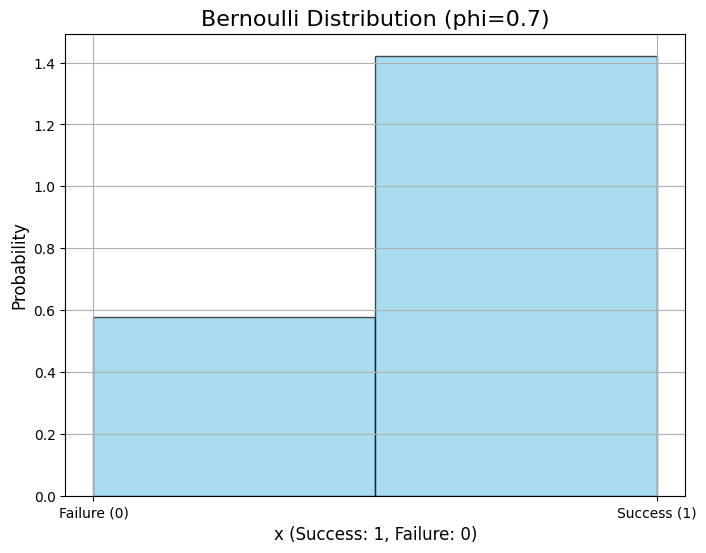

Probability of Success (P(x=1)): 0.711
Probability of Failure (P(x=0)): 0.289
Expectation (E[x]): 0.700
Variance (Var(x)): 0.210


In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Bernoulli distribution with parameter phi
phi = 0.7  # Probability of success (x=1)
n_samples = 10000  # Number of samples to generate

# Generate Bernoulli random variables
samples = np.random.binomial(1, phi, n_samples)

# Calculate the probability of success and failure
prob_success = np.mean(samples)  # This should be close to phi
prob_failure = 1 - prob_success  # This should be close to (1 - phi)

# Calculate expectation and variance
expectation = phi
variance = phi * (1 - phi)

# Plot the histogram of samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=2, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Annotate the plot
plt.title(f"Bernoulli Distribution (phi={phi})", fontsize=16)
plt.xlabel("x (Success: 1, Failure: 0)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.xticks([0, 1], ['Failure (0)', 'Success (1)'])
plt.grid(True)

# Show the plot
plt.show()

# Print the results
print(f"Probability of Success (P(x=1)): {prob_success:.3f}")
print(f"Probability of Failure (P(x=0)): {prob_failure:.3f}")
print(f"Expectation (E[x]): {expectation:.3f}")
print(f"Variance (Var(x)): {variance:.3f}")


## 3.9.2 Multinoulli Distribution

The **multinoulli** or **categorical distribution** is a distribution over a single discrete variable with $k$ different states, where $k$ is finite. The multinoulli distribution is parametrized by a vector $p \in [0, 1]^{k-1}$, where $p_i$ gives the probability of the $i$-th state. The final, $k$-th state's probability is given by:

$$
p_k = 1 - \sum_{i=1}^{k-1} p_i
$$

Note that we must constrain $\sum_{i=1}^{k-1} p_i \leq 1$.

The multinoulli distribution is a special case of the **multinomial distribution**. A multinomial distribution is the distribution over vectors in $\{0, \dots, n\}^k$ representing how many times each of the $k$ categories is visited when $n$ samples are drawn from a multinoulli distribution. Many texts use the term **multinomial** to refer to multinoulli distributions without clarifying that they refer only to the $n = 1$ case.

The multinoulli distribution is often used to model distributions over categories of objects. Therefore, we do not usually assume that state 1 has a numerical value of 1, etc.

### Properties of the Multinoulli Distribution:
- The probabilities $p_1, p_2, \dots, p_{k-1}$ are specified, and the probability of the $k$-th state is given by:

$$
p_k = 1 - \sum_{i=1}^{k-1} p_i
$$

- The probability of observing a particular state $x_i$ in a single trial is:

$$
P(x = x_i) = p_i, \quad \text{for} \, i = 1, 2, \dots, k
$$

### Example:
Suppose you have a categorical variable with 3 categories, and the probabilities for the first two categories are $p_1 = 0.5$ and $p_2 = 0.3$. The probability of the third category would be:

$$
p_3 = 1 - (0.5 + 0.3) = 0.2
$$

### Note:
- The Bernoulli and multinoulli distributions are sufficient to describe any distribution over their domain, not because they are particularly powerful, but because their domain is simple. They model discrete variables for which it is feasible to enumerate all of the states. However, when dealing with continuous variables, there are uncountably many states, so any distribution described by a small number of parameters must impose strict limits on the distribution.


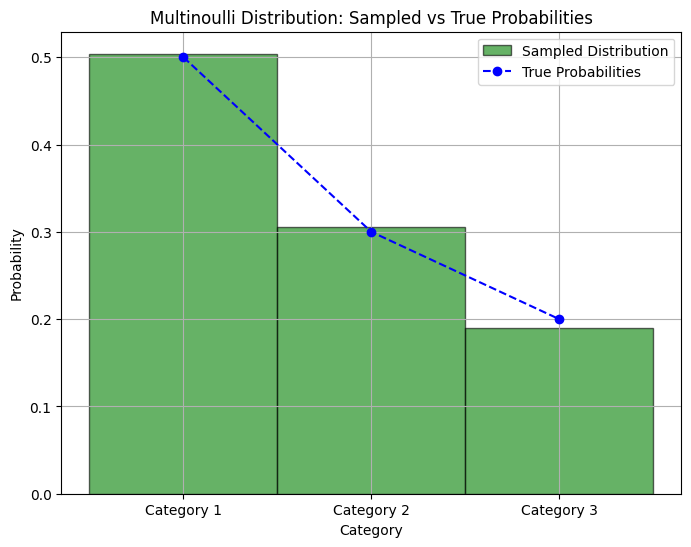

Probabilities of each category: [0.5 0.3 0.2]


In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the multinoulli (categorical) distribution class
class Multinoulli:
    def __init__(self, probabilities):
        # Ensure the sum of the probabilities is 1
        self.probabilities = np.array(probabilities)
        self.probabilities[-1] = 1 - np.sum(self.probabilities[:-1])
        assert np.isclose(np.sum(self.probabilities), 1), "Probabilities must sum to 1"

    def sample(self, num_samples):
        # Sample from the multinoulli distribution
        return np.random.choice(len(self.probabilities), size=num_samples, p=self.probabilities)

    def probability(self, x):
        # Return the probability of a particular state x
        return self.probabilities[x]

# Example: Define a Multinoulli distribution with 3 categories
probabilities = [0.5, 0.3, 0.2]  # Ensure there are 3 probabilities for 3 categories
categorical = Multinoulli(probabilities)

# Generate samples from the distribution
num_samples = 1000  # Number of samples
samples = categorical.sample(num_samples)

# Plotting the histogram of sampled categories
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=np.arange(4) - 0.5, density=True, alpha=0.6, color='g', edgecolor='black', label='Sampled Distribution')

# Adding the actual probabilities as lines
categories = [0, 1, 2]
plt.plot(categories, probabilities, marker='o', linestyle='--', color='b', label='True Probabilities')

plt.xticks(categories, ['Category 1', 'Category 2', 'Category 3'])
plt.xlabel("Category")
plt.ylabel("Probability")
plt.title("Multinoulli Distribution: Sampled vs True Probabilities")
plt.grid(True)
plt.legend()
plt.show()

# Output the probabilities
print("Probabilities of each category:", categorical.probabilities)


# 3.9.3 Gaussian Distribution

The Gaussian distribution, also known as the **normal distribution**, is the most commonly used distribution over real numbers. Its probability density function (PDF) is given by:

$$
N(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{1}{2\sigma^2}(x - \mu)^2 \right)
$$

Where:
- $ \mu \in \mathbb{R} $ is the mean (or central peak) of the distribution.
- $ \sigma^2 \in (0, \infty) $ is the variance of the distribution.
- $ \sigma $ is the standard deviation, which controls the width of the peak.

### Properties:
- The mean of the distribution is $ E[x] = \mu $.
- The variance is $ \text{Var}(x) = \sigma^2 $.
- The standard deviation is $ \sigma $, which governs the spread of the distribution.

### Efficient Parameterization:
Instead of using variance, we can parametrize the Gaussian distribution using **precision**, $ \beta = \frac{1}{\sigma^2} $, as follows:

$$
N(x; \mu, \beta^{-1}) = \frac{\sqrt{\beta}}{\sqrt{2\pi}} \exp\left( -\frac{1}{2} \beta (x - \mu)^2 \right)
$$

### Why is the Gaussian Distribution Useful?
1. **Central Limit Theorem**: The central limit theorem states that the sum of many independent random variables tends to follow a normal distribution, regardless of the original distribution of the variables. Thus, many real-world phenomena can be modeled using a Gaussian distribution.
  
2. **Maximum Uncertainty**: Among all distributions with the same variance, the Gaussian distribution maximizes the entropy (or uncertainty). This means it is the distribution that introduces the least prior knowledge, making it a good default choice when little information is known about the system.

### Multivariate Gaussian Distribution:
The normal distribution can also be extended to multiple variables. The **multivariate normal distribution** is used for vectors of random variables, and it is parametrized as follows:

$$
N(x; \mu, \Sigma) = \frac{1}{(2\pi)^{n/2} \sqrt{\text{det}(\Sigma)}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

Where:
- $ \mu \in \mathbb{R}^n $ is the mean vector.
- $ \Sigma \in \mathbb{R}^{n \times n} $ is the covariance matrix.

### Precision Matrix:
Instead of using the covariance matrix $ \Sigma $, we can use the **precision matrix** $ \beta $, which is the inverse of the covariance matrix:

$$
N(x; \mu, \beta^{-1}) = \frac{1}{(2\pi)^{n/2} \sqrt{\text{det}(\beta)}} \exp\left( -\frac{1}{2} (x - \mu)^T \beta (x - \mu) \right)
$$

### Isotropic Gaussian Distribution:
A simpler version of the Gaussian distribution is the **isotropic Gaussian distribution**, where the covariance matrix is a scalar multiple of the identity matrix, meaning the variables are independent with the same variance.

---

###Univariate Gaussian Distribution

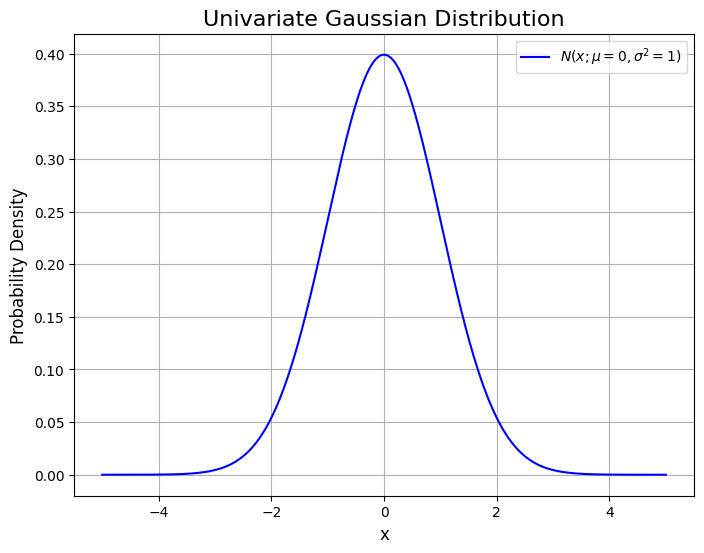

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate a range of values for x
x = np.linspace(-5, 5, 1000)

# Calculate the PDF for the Gaussian distribution
pdf = (1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Plot the PDF of the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=r'$N(x; \mu=0, \sigma^2=1)$', color='b')
plt.title("Univariate Gaussian Distribution", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


This is a plot of the normal distribution with mean $$ \mu = 0 $$ and standard deviation $$ \sigma = 1 $$.
The shape of the curve is the classic "bell curve".


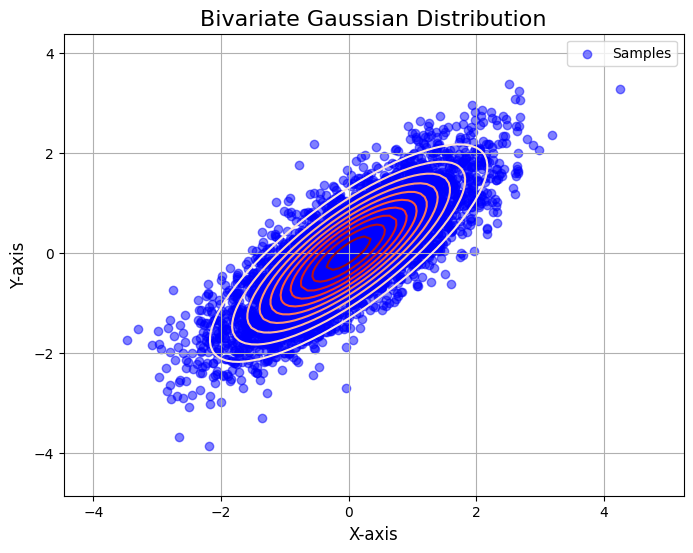

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the multivariate Gaussian distribution
mu = [0, 0]  # Mean vector (mean of x and y)
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix (variance and covariance of x and y)

# Generate samples from the bivariate normal distribution
samples = np.random.multivariate_normal(mu, cov, 5000)

# Extract x and y components of the samples
x, y = samples[:, 0], samples[:, 1]

# Create a figure for plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the samples
plt.scatter(x, y, alpha=0.5, color='blue', label="Samples")

# Set title and labels for the plot
plt.title("Bivariate Gaussian Distribution", fontsize=16)
plt.xlabel("X-axis", fontsize=12)
plt.ylabel("Y-axis", fontsize=12)

# Set the limits for the contour plot
xmin, xmax = x.min() - 1, x.max() + 1
ymin, ymax = y.min() - 1, y.max() + 1

# Create a meshgrid for the contour plot
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

# Flatten the meshgrid and stack the x and y points
grid_points = np.column_stack([xx.flatten(), yy.flatten()])

# Compute the probability density function (PDF) of the bivariate Gaussian using scipy.stats
z = multivariate_normal(mu, cov).pdf(grid_points).reshape(xx.shape)

# Plot the contour of the bivariate Gaussian distribution
plt.contour(xx, yy, z, cmap='Reds', levels=10)

# Display grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## 3.9.4 Exponential and Laplace Distributions

In the context of deep learning, we often want to have a probability distribution with a sharp point at $x = 0$. To accomplish this, we can use the **exponential distribution**:

$$
p(x; \lambda) = \lambda \cdot 1_{x \geq 0} \exp(-\lambda x) \tag{3.25}
$$

The exponential distribution uses the indicator function $1_{x \geq 0}$ to assign probability zero to all negative values of $x$.

A closely related probability distribution that allows us to place a sharp peak of probability mass at an arbitrary point $\mu$ is the **Laplace distribution**:

$$
\text{Laplace}(x; \mu, \gamma) = \frac{1}{2\gamma} \exp \left( -\frac{|x - \mu|}{\gamma} \right) \tag{3.26}
$$


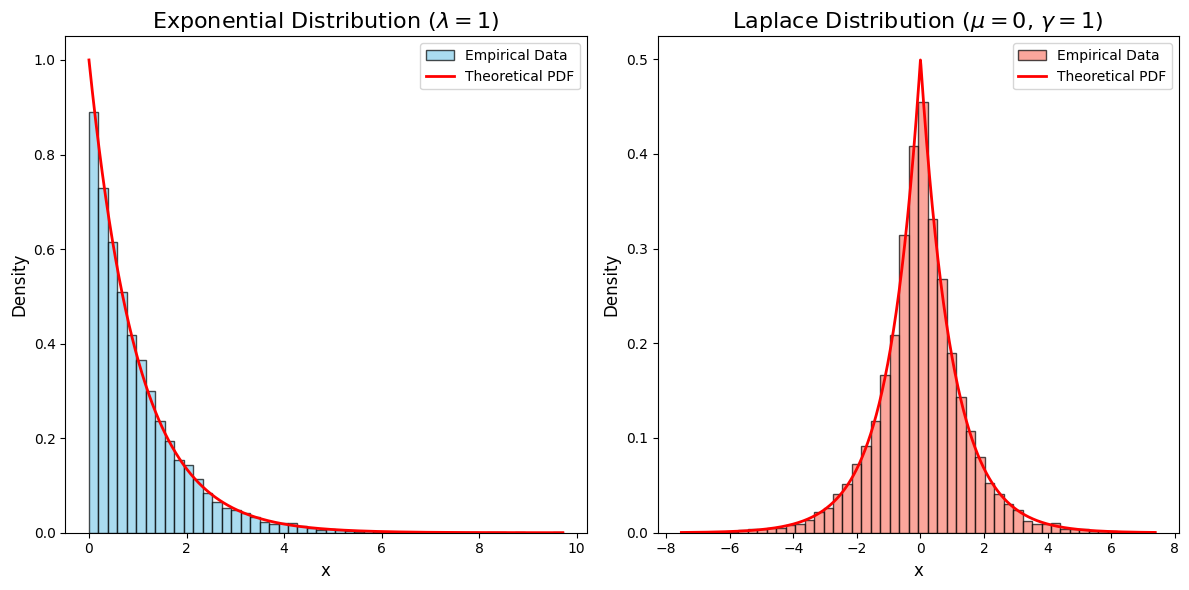

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, laplace

# Parameters for the Exponential and Laplace distributions
lambda_ = 1.0  # Rate parameter (λ) for Exponential
mu = 0  # Mean (µ) for Laplace
gamma = 1.0  # Scale parameter (γ) for Laplace

# Generate samples
n_samples = 10000
exp_samples = np.random.exponential(1 / lambda_, n_samples)
laplace_samples = np.random.laplace(mu, gamma, n_samples)

# Create the range of x values for plotting the PDFs
x_exp = np.linspace(0, np.max(exp_samples), 1000)
x_laplace = np.linspace(np.min(laplace_samples), np.max(laplace_samples), 1000)

# Calculate the theoretical PDFs
pdf_exp = expon.pdf(x_exp, scale=1/lambda_)
pdf_laplace = laplace.pdf(x_laplace, loc=mu, scale=gamma)

# Plot the distributions

plt.figure(figsize=(12, 6))

# Subplot 1: Exponential Distribution
plt.subplot(1, 2, 1)
plt.hist(exp_samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Empirical Data')
plt.plot(x_exp, pdf_exp, 'r-', lw=2, label='Theoretical PDF')
plt.title("Exponential Distribution ($\lambda = 1$)", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

# Subplot 2: Laplace Distribution
plt.subplot(1, 2, 2)
plt.hist(laplace_samples, bins=50, density=True, alpha=0.7, color='salmon', edgecolor='black', label='Empirical Data')
plt.plot(x_laplace, pdf_laplace, 'r-', lw=2, label='Theoretical PDF')
plt.title("Laplace Distribution ($\mu = 0$, $\gamma = 1$)", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## 3.9.5 The Dirac Distribution and Empirical Distribution

In some cases, we wish to specify that all of the mass in a probability distribution clusters around a single point. This can be accomplished by defining a probability density function (PDF) using the **Dirac delta function**, denoted as $\delta(x)$:

$$
p(x) = \delta(x - \mu)
$$

The Dirac delta function is a special function that is defined such that it is zero-valued everywhere except at $x = 0$, yet integrates to 1. It is not an ordinary function, but a **generalized function** or **distribution** that is defined in terms of its properties when integrated. We can think of the Dirac delta function as being the limit of a series of functions that concentrate more and more mass at \( x = 0 \), while spreading less across other points.

When we shift the Dirac delta function by $\mu $, we obtain an infinitely narrow and infinitely high peak of probability mass located at $ x = \mu $:

$$
p(x) = \delta(x - \mu)
$$

A common use of the Dirac delta function is as a component of an **empirical distribution**:

$$
\hat{p}(x) = \frac{1}{m} \sum_{i=1}^{m} \delta(x - x^{(i)})
$$

where $x^{(i)}$ represents the data points in the dataset. The empirical distribution puts equal probability mass $ \frac{1}{m} $ on each of the $\ m $ data points in the sample. This is particularly useful for continuous variables, as it captures the probability mass around each individual sample.

For **discrete variables**, the empirical distribution can be conceptualized as a **Multinoulli distribution**, where each possible input value is assigned a probability equal to the empirical frequency of that value in the dataset.

The **empirical distribution** is important for training machine learning models, as it defines the distribution that we sample from when training on a dataset. From another perspective, the empirical distribution is the one that maximizes the likelihood of the training data.


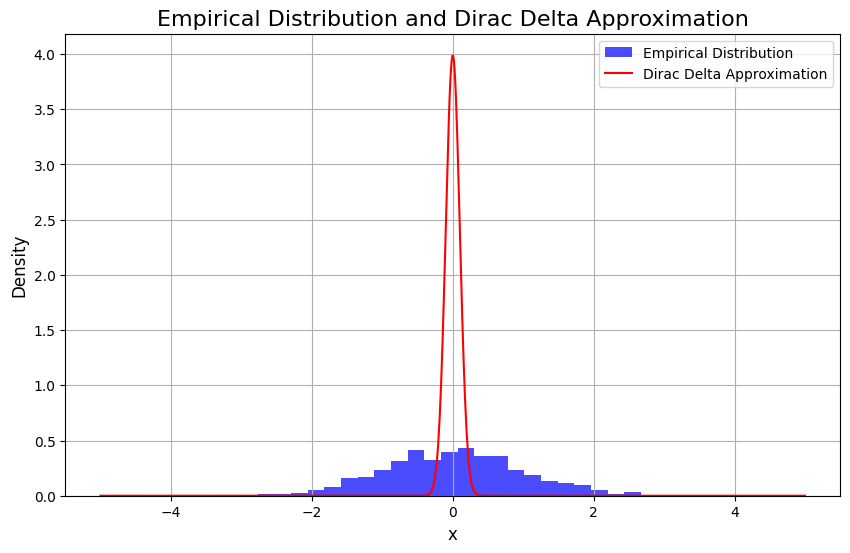

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define a very narrow Gaussian to approximate the Dirac delta function
def dirac_delta_approximation(x, mu, epsilon=0.01):
    return (1 / (epsilon * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / epsilon) ** 2)

# Generate a random dataset
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

# Calculate the empirical distribution by plotting the histogram
plt.figure(figsize=(10, 6))

# Plot the empirical distribution (histogram)
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue', label='Empirical Distribution')

# Plot the Dirac delta approximation (a very narrow Gaussian centered at 0)
x_values = np.linspace(-5, 5, 1000)
y_values = dirac_delta_approximation(x_values, mu=0, epsilon=0.1)
plt.plot(x_values, y_values, color='red', label='Dirac Delta Approximation')

# Adding labels and title
plt.title("Empirical Distribution and Dirac Delta Approximation", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(loc='upper right')

plt.grid(True)
plt.show()


### 3.9.6 Mixtures of Distributions

In many cases, complex probability distributions can be constructed by combining simpler distributions. One common approach for this is the **mixture distribution**, which is made up of multiple component distributions.

#### Definition of a Mixture Distribution:
A mixture distribution is formed by several component distributions, where each sample is drawn from one of these components. The choice of which component distribution generates a sample is determined by sampling a component identity from a **multinoulli distribution**. The general form of a mixture distribution is:

$$
P(x) = \sum_{i} P(c = i) P(x | c = i)
$$

Here, $P(c)$ represents the multinoulli distribution over the component identities, and $P(x | c = i)$ represents the likelihood of observing $x$ given the $i$-th component.

#### Example:
One example of a mixture distribution is the **empirical distribution** over real-valued variables, which can be viewed as a mixture of Dirac delta functions, each corresponding to one training example in a dataset.

#### Key Concepts in Mixture Models:
- **Latent Variables**: A mixture model introduces the concept of latent variables, which are random variables that are not directly observable. In this case, the component identity variable $c$ acts as a latent variable. Even though $c$ is not observed, it influences the observed variable $x$ through the joint distribution:

$$
P(x, c) = P(x | c)P(c)
$$

- **Gaussian Mixture Models (GMMs)**: A **Gaussian Mixture Model** (GMM) is a specific type of mixture model where each component is a Gaussian distribution. Each component has its own mean ($\mu^{(i)}$) and covariance matrix ($\Sigma^{(i)}$). In some variations, the covariances may be shared across components, or they could be constrained to be diagonal or isotropic.

#### Gaussian Mixture Model:
A GMM is described by:
- **Component means**: $\mu_{i}$
- **Component covariances**: $\Sigma_{i}$
- **Prior probabilities**: $\alpha_{i} = P(c = i)$, which represents the prior probability of each component.

The GMM is a **universal approximator** of densities, meaning it can approximate any smooth probability density function (PDF) with sufficient components, allowing it to represent complex distributions with a simple mixture of Gaussian components.

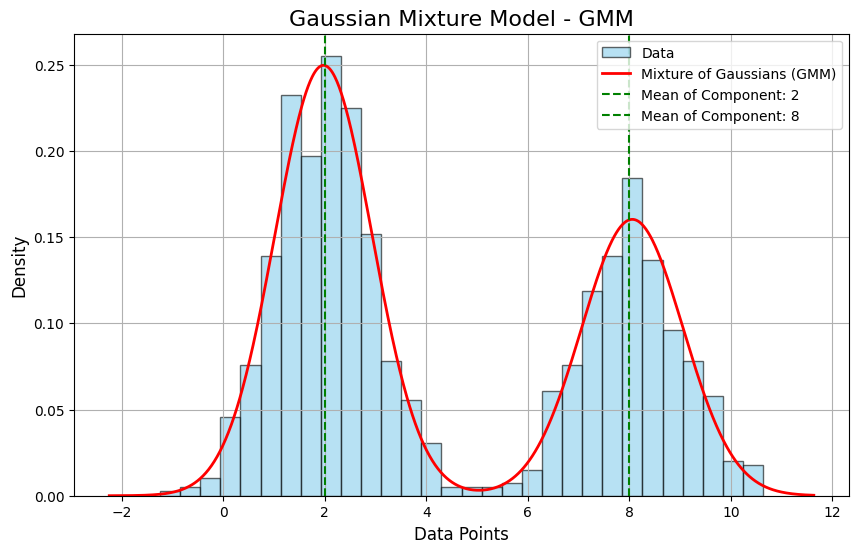

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the Gaussian Mixture Model
means = [2, 8]  # Means for the two components
covariances = [1, 1]  # Standard deviations for the two components
weights = [0.6, 0.4]  # Prior probabilities for each component

# Generate synthetic data from the GMM
n_samples = 1000  # Total number of samples
n_components = len(means)

# Generate random data from each component
samples = np.concatenate([np.random.normal(means[i], covariances[i], int(weights[i] * n_samples))
                          for i in range(n_components)])

# Create a GaussianMixture model
gmm = GaussianMixture(n_components=n_components, weights_init=weights,
                      means_init=np.array(means).reshape(-1, 1),
                      covariance_type='diag')  # Using 'diag' covariance type

# Fit the GMM model to the synthetic data
gmm.fit(samples.reshape(-1, 1))

# Predict the probabilities for each component for each sample
predicted_probs = gmm.predict_proba(samples.reshape(-1, 1))

# Generate values for plotting the mixture model's PDF
x = np.linspace(samples.min() - 1, samples.max() + 1, 1000).reshape(-1, 1)
log_prob = gmm.score_samples(x)
pdf = np.exp(log_prob)

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Data')

# Plot the GMM's PDF (the mixture of Gaussians)
plt.plot(x, pdf, label='Mixture of Gaussians (GMM)', color='red', lw=2)

# Mark the component means
for mean in means:
    plt.axvline(mean, color='green', linestyle='--', label=f'Mean of Component: {mean}')

plt.title("Gaussian Mixture Model - GMM", fontsize=16)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


# 3.10 Useful Properties of Common Functions

Certain functions arise often while working with probability distributions, especially those used in deep learning models. Below are some commonly encountered functions and their useful properties.

### Logistic Sigmoid Function
The logistic sigmoid function is defined as:

$$
\sigma(x) = \frac{1}{1 + \exp(-x)}
$$

The logistic sigmoid is commonly used to produce the φ parameter of a Bernoulli distribution because its range is $ (0,1)$, which lies within the valid range of values for the φ parameter.

The sigmoid function saturates when its argument is very positive or very negative, meaning that the function becomes very flat and insensitive to small changes in its input. Below is a graph of the sigmoid function:


### Softplus Function
The softplus function is defined as:

$$
\zeta(x) = \log(1 + \exp(x))
$$

The softplus function can be useful for producing the β or σ parameter of a normal distribution because its range is $(0, \infty)$. It also arises commonly when manipulating expressions involving sigmoids. The name "softplus" comes from the fact that it is a smoothed or "softened" version of the **ReLU** function:

$$
x^+ = \max(0, x)
$$


### Useful Properties of the Logistic Sigmoid and Softplus Functions
The following properties are useful for understanding and manipulating these functions:

- Logistic sigmoid function:

$$
\sigma(x) = \frac{\exp(x)}{\exp(x) + \exp(0)} \tag{3.33}
$$

- Derivative of the sigmoid:

$$
\frac{d}{dx}\sigma(x) = \sigma(x)(1 - \sigma(x)) \tag{3.34}
$$

- Complement of the sigmoid:

$$
1 - \sigma(x) = \sigma(-x) \tag{3.35}
$$

- Log of the sigmoid:

$$
\log \sigma(x) = -\zeta(-x) \tag{3.36}
$$

- Derivative of the softplus:

$$
\frac{d}{dx}\zeta(x) = \sigma(x) \tag{3.37}
$$

- Inverse of the logistic sigmoid:

$$
\forall x \in (0, 1), \sigma^{-1}(x) = \log\left(\frac{x}{1 - x}\right) \tag{3.38}
$$

- Inverse of the softplus:

$$
\forall x > 0, \zeta^{-1}(x) = \log(\exp(x) - 1) \tag{3.39}
$$

- Relation between softplus and sigmoid:

$$
\zeta(x) = \int_{-\infty}^{x} \sigma(y) \, dy \tag{3.40}
$$

- Identity of softplus and its negative counterpart:

$$
\zeta(x) - \zeta(-x) = x \tag{3.41}
$$

The function $\sigma^{-1}(x)$ is called the **logit** in statistics, but this term is more rarely used in machine learning.

Equation (3.41) provides extra justification for the name "softplus." The softplus function is intended as a smoothed version of the positive part function:

$$
x^+ = \max\{0, x\}
$$

Just as $ x $ can be recovered from its positive and negative parts via the identity $$ x^+ - x^- = x $$, it is also possible to recover $ x $ using the relationship between $\zeta(x)$ and $\zeta(-x)$ as shown in equation (3.41).


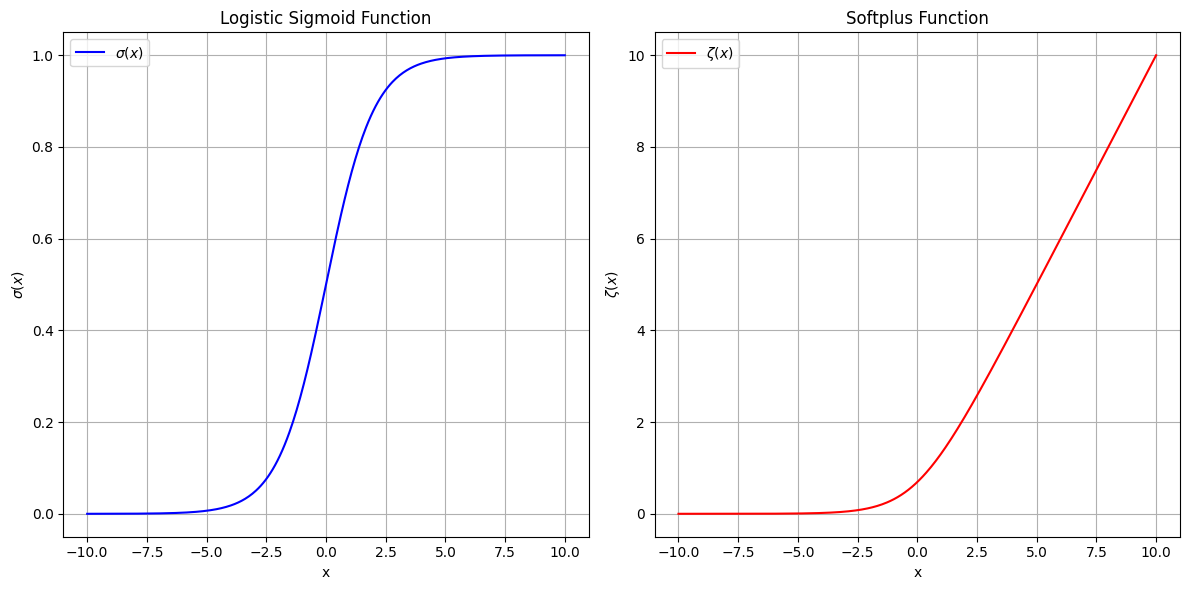

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the softplus function
def softplus(x):
    return np.log(1 + np.exp(x))

# Create a range of x values for plotting
x = np.linspace(-10, 10, 400)

# Compute the sigmoid and softplus values
sigmoid_values = sigmoid(x)
softplus_values = softplus(x)

# Plot the sigmoid and softplus functions
plt.figure(figsize=(12, 6))

# Sigmoid function plot
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_values, label=r'$\sigma(x)$', color='blue')
plt.title('Logistic Sigmoid Function')
plt.xlabel('x')
plt.ylabel(r'$\sigma(x)$')
plt.grid(True)
plt.legend()

# Softplus function plot
plt.subplot(1, 2, 2)
plt.plot(x, softplus_values, label=r'$\zeta(x)$', color='red')
plt.title('Softplus Function')
plt.xlabel('x')
plt.ylabel(r'$\zeta(x)$')
plt.grid(True)
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Common Functions in Machine Learning and Deep Learning

## 1. **Activation Functions**
1. **ReLU (Rectified Linear Unit)**
   $$ \text{ReLU}(x) = \max(0, x) $$  
   **Description**: ReLU is one of the most popular activation functions due to its simplicity and efficiency. It outputs the input if positive, otherwise, it returns zero. It does not saturate for positive values, but can cause the "dying ReLU" problem where neurons stop learning if they get stuck in the negative region.

2. **Leaky ReLU**
   $$ \text{Leaky ReLU}(x) = \max(\alpha x, x) $$  
   **Description**: A modification of ReLU where a small, non-zero gradient is allowed when \( x \) is negative, solving the "dying ReLU" issue. The slope for negative values is controlled by the parameter \( \alpha \).

3. **Parametric ReLU (PReLU)**
   $$ \text{PReLU}(x) = \max(\alpha x, x) $$, where \( \alpha \) is learned during training.  
   **Description**: An extension of Leaky ReLU where the slope \( \alpha \) is learned from the data instead of being predefined, making it more flexible.

4. **Tanh (Hyperbolic Tangent)**
   $$ \tanh(x) = \frac{2}{1 + e^{-2x}} - 1 $$  
   **Description**: Outputs values in the range (-1, 1), making it useful for problems where the output needs to be centered around 0. It suffers from the vanishing gradient problem when the inputs are far from zero.

5. **Sigmoid (Logistic Sigmoid)**
   $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$  
   **Description**: Maps inputs to values in the range (0, 1). It's commonly used for binary classification tasks but has the vanishing gradient problem when inputs are large or small.

6. **Softmax**
   $$ \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}} $$  
   **Description**: Used primarily in the output layer of a multi-class classification problem. It converts raw scores into probabilities, where the sum of all outputs equals 1.

7. **Swish**
   $$ \text{Swish}(x) = x \cdot \sigma(x) $$  
   **Description**: A newer activation function that blends ReLU and sigmoid. It avoids the vanishing gradient issue, has a smoother gradient, and can lead to better performance in deep networks.

8. **ELU (Exponential Linear Unit)**
   $$ \text{ELU}(x) =
   \begin{cases}
   x & \text{if } x > 0 \\
   \alpha (e^x - 1) & \text{if } x \leq 0
   \end{cases} $$  
   **Description**: Similar to ReLU, but the negative values are given a non-zero output (exponential), which helps with the mean activation output being closer to zero. This avoids "dying neurons" and can improve learning speed.

9. **GELU (Gaussian Error Linear Unit)**
   $$ \text{GELU}(x) = 0.5x \left( 1 + \tanh\left( \sqrt{\frac{2}{\pi}} \left( x + 0.044715x^3 \right) \right) \right) $$  
   **Description**: A smooth, differentiable function that provides a probabilistic approach, where the input is passed through a Gaussian error function. It has been found to outperform ReLU and its variants in certain deep learning tasks.

10. **Hard Sigmoid**
    $$ \text{Hard Sigmoid}(x) = \max(0, \min(1, 0.2x + 0.5)) $$  
    **Description**: An approximation of the sigmoid function, faster to compute since it only involves linear operations. It is often used in low-power or resource-constrained environments.

11. **Hard Swish**
    $$ \text{Hard Swish}(x) = x \cdot \text{Hard Sigmoid}(x) $$  
    **Description**: A computationally efficient variant of the Swish activation function. It combines a hard version of the sigmoid with the original Swish function to reduce computational overhead.

12. **Mish**
    $$ \text{Mish}(x) = x \cdot \tanh(\text{softplus}(x)) $$  
    **Description**: A newer activation function that is smooth and non-monotonic. It has been shown to outperform ReLU and its variants in some benchmarks and is similar to Swish but smoother.

13. **SELU (Scaled Exponential Linear Unit)**
    $$ \text{SELU}(x) = \lambda \cdot
    \begin{cases}
    x & \text{if } x > 0 \\
    \alpha (e^x - 1) & \text{if } x \leq 0
    \end{cases} $$  
    **Description**: SELU is designed for use in networks where self-normalization is required. It automatically normalizes the activations to have zero mean and unit variance.

14. **Swish-1**
    $$ \text{Swish-1}(x) = x \cdot \frac{1}{1 + e^{-x}} $$  
    **Description**: A simplified version of the Swish function that removes the need for the sigmoid multiplication in the activation function.

15. **Softplus**
    $$ \text{Softplus}(x) = \log(1 + e^x) $$  
    **Description**: A smooth approximation of ReLU. It has a small gradient even for very large negative inputs, which makes it useful for avoiding the "dying ReLU" problem.

## 2. **Probability Functions**
16. **Gaussian Function**
    $$ f(x) = e^{-\frac{x^2}{2\sigma^2}} $$  
    **Description**: Gaussian function (or normal distribution) is widely used in statistics and machine learning. It is symmetric and often used for modeling continuous data with a bell-shaped distribution.

17. **Logistic Distribution (Logistic Function)**
    $$ \sigma(x) = \frac{1}{1 + e^{-x}} $$  
    **Description**: This function is similar to the sigmoid function, but with a heavier tail. It is commonly used in regression and classification tasks.

18. **Bernoulli Distribution**
    $$ P(X = x) = \phi^x (1 - \phi)^{1 - x} $$, where \( \phi \) is the probability of success.  
    **Description**: A discrete probability distribution representing binary outcomes (e.g., success/failure). It models experiments with exactly two outcomes.

19. **Binomial Distribution**
    $$ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k} $$  
    **Description**: The binomial distribution models the number of successes in \( n \) independent Bernoulli trials, each with success probability \( p \).

20. **Poisson Distribution**
    $$ P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!} $$  
    **Description**: A discrete distribution that models the number of events occurring in a fixed interval of time or space, with a known average rate of occurrence.

21. **Normal (Gaussian) Distribution**
    $$ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$  
    **Description**: A continuous probability distribution that is symmetric about its mean \( \mu \). It is one of the most widely used distributions in statistics.

22. **Exponential Distribution**
    $$ f(x) = \lambda e^{-\lambda x} $$  
    **Description**: A continuous probability distribution used to model the time between events in a Poisson process, i.e., events that occur randomly over time.

23. **Gamma Distribution**
    $$ f(x) = \frac{x^{\alpha-1} e^{-\frac{x}{\beta}}}{\Gamma(\alpha)\beta^\alpha} $$  
    **Description**: A family of continuous probability distributions that generalize the exponential distribution. It is commonly used for modeling waiting times.

24. **Beta Distribution**
    $$ f(x; \alpha, \beta) = \frac{x^{\alpha-1} (1-x)^{\beta-1}}{B(\alpha, \beta)} $$  
    **Description**: A continuous distribution defined on the interval [0, 1], often used in Bayesian statistics and modeling proportions or probabilities.

25. **Dirichlet Distribution**
    $$ P(x_1, x_2, ..., x_k) = \frac{1}{B(\alpha_1, \alpha_2, ..., \alpha_k)} \prod_{i=1}^{k} x_i^{\alpha_i - 1} $$  
    **Description**: A continuous probability distribution that is the multivariate generalization of the Beta distribution. It is used to model random vectors whose components are proportions that sum to 1.

26. **Multinomial Distribution**
    $$ P(x_1, x_2, ..., x_k) = \frac{n!}{x_1! x_2! ... x_k!} p_1^{x_1} p_2^{x_2} ... p_k^{x_k} $$  
    **Description**: Generalization of the binomial distribution for multi-class problems. It models the number of occurrences of each outcome in a set of trials.

27. **Log-Normal Distribution**
    $$ f(x) = \frac{1}{x\sigma\sqrt{2\pi}} e^{-\frac{(\log(x) - \mu)^2}{2\sigma^2}} $$  
    **Description**: A distribution of a random variable whose logarithm is normally distributed. It is used in financial modeling for asset prices.

28. **Cauchy Distribution**
    $$ f(x) = \frac{1}{\pi \gamma \left[ 1 + \left(\frac{x - x_0}{\gamma}\right)^2 \right]} $$  
    **Description**: A distribution with heavy tails, used in robust statistics. It has undefined mean and variance, making it useful for modeling data with outliers.

## 3. **Other Useful Functions**
29. **Recurrent Functions**
    - **ELM (Extreme Learning Machine)**
    - **LSTM (Long Short-Term Memory)** - A specific form of Recurrent Neural Network (RNN).
    
30. **Bessel Functions**
    - Often used in advanced physics and signal processing contexts.
    
31. **Sinc Function**
    $$ \text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} $$  
    **Description**: A function used in signal processing and Fourier transforms.

32. **Exponential Function**
    $$ f(x) = e^x $$  
    **Description**: The exponential function is fundamental in many areas of mathematics and science, often used to model growth and decay processes.


###Activation Functions

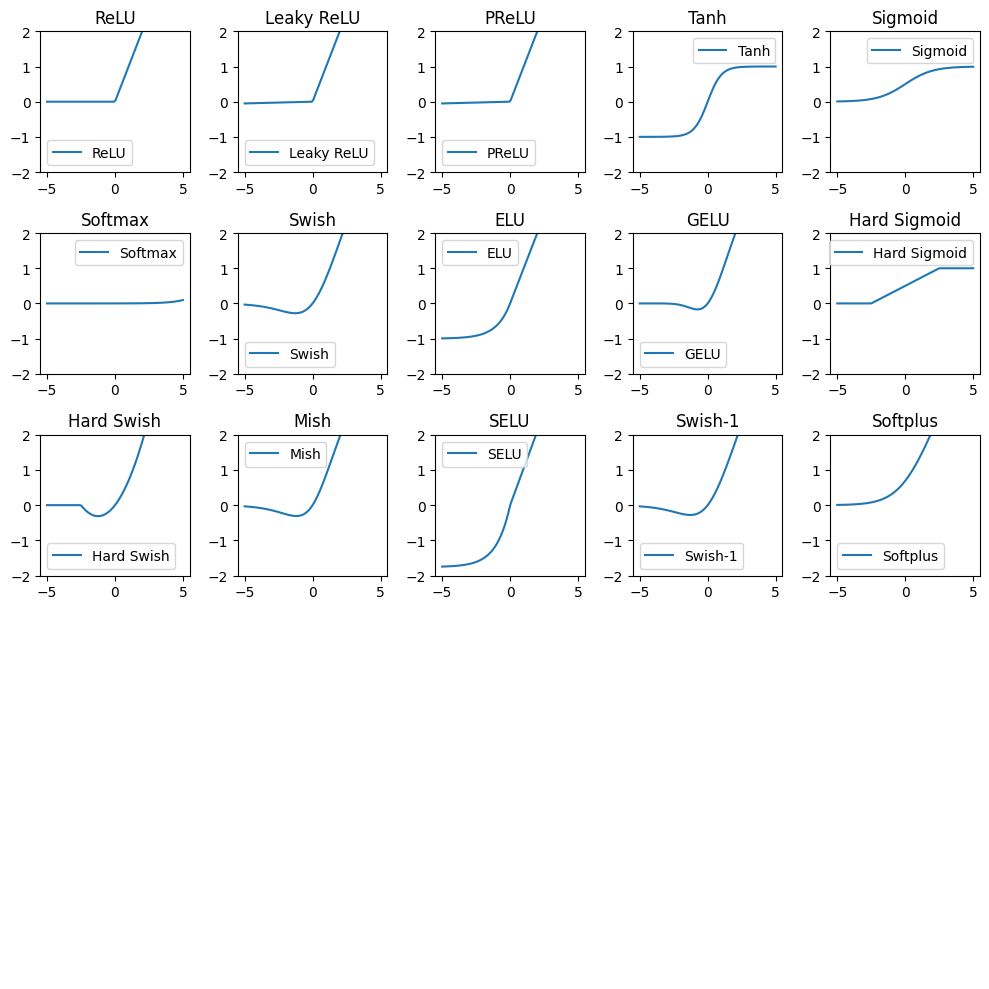

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, alpha=0.01):  # Default alpha value added here
    return np.where(x > 0, x, alpha * x)

def tanh(x):
    return np.tanh(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def swish(x):
    return x * sigmoid(x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

def hard_swish(x):
    return x * hard_sigmoid(x)

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def selu(x, alpha=1.6732632423543772, scale=1.0507009873554805):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish_1(x):
    return x * (1 / (1 + np.exp(-x)))

def softplus(x):
    return np.log(1 + np.exp(x))

# Setup for plotting
x = np.linspace(-5, 5, 100)
functions = [relu, leaky_relu, prelu, tanh, sigmoid, softmax, swish, elu, gelu, hard_sigmoid,
             hard_swish, mish, selu, swish_1, softplus]
function_names = ['ReLU', 'Leaky ReLU', 'PReLU', 'Tanh', 'Sigmoid', 'Softmax', 'Swish', 'ELU', 'GELU',
                  'Hard Sigmoid', 'Hard Swish', 'Mish', 'SELU', 'Swish-1', 'Softplus']

# Create a 5x5 grid for comparison
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Plot each activation function
for i, ax in enumerate(axes.flat):
    if i < len(functions):  # Only plot the functions we have
        # For PReLU, we provide a default value for alpha
        if function_names[i] == "PReLU":
            ax.plot(x, functions[i](x, alpha=0.01), label=function_names[i])  # Passing alpha for PReLU
        else:
            ax.plot(x, functions[i](x), label=function_names[i])

        ax.set_title(function_names[i])
        ax.set_ylim([-2, 2])  # Set the y-axis range for consistency
        ax.legend()

# Hide any empty subplots (if fewer than 25 functions)
for i in range(len(functions), 25):
    axes.flat[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


###Probability Functioons

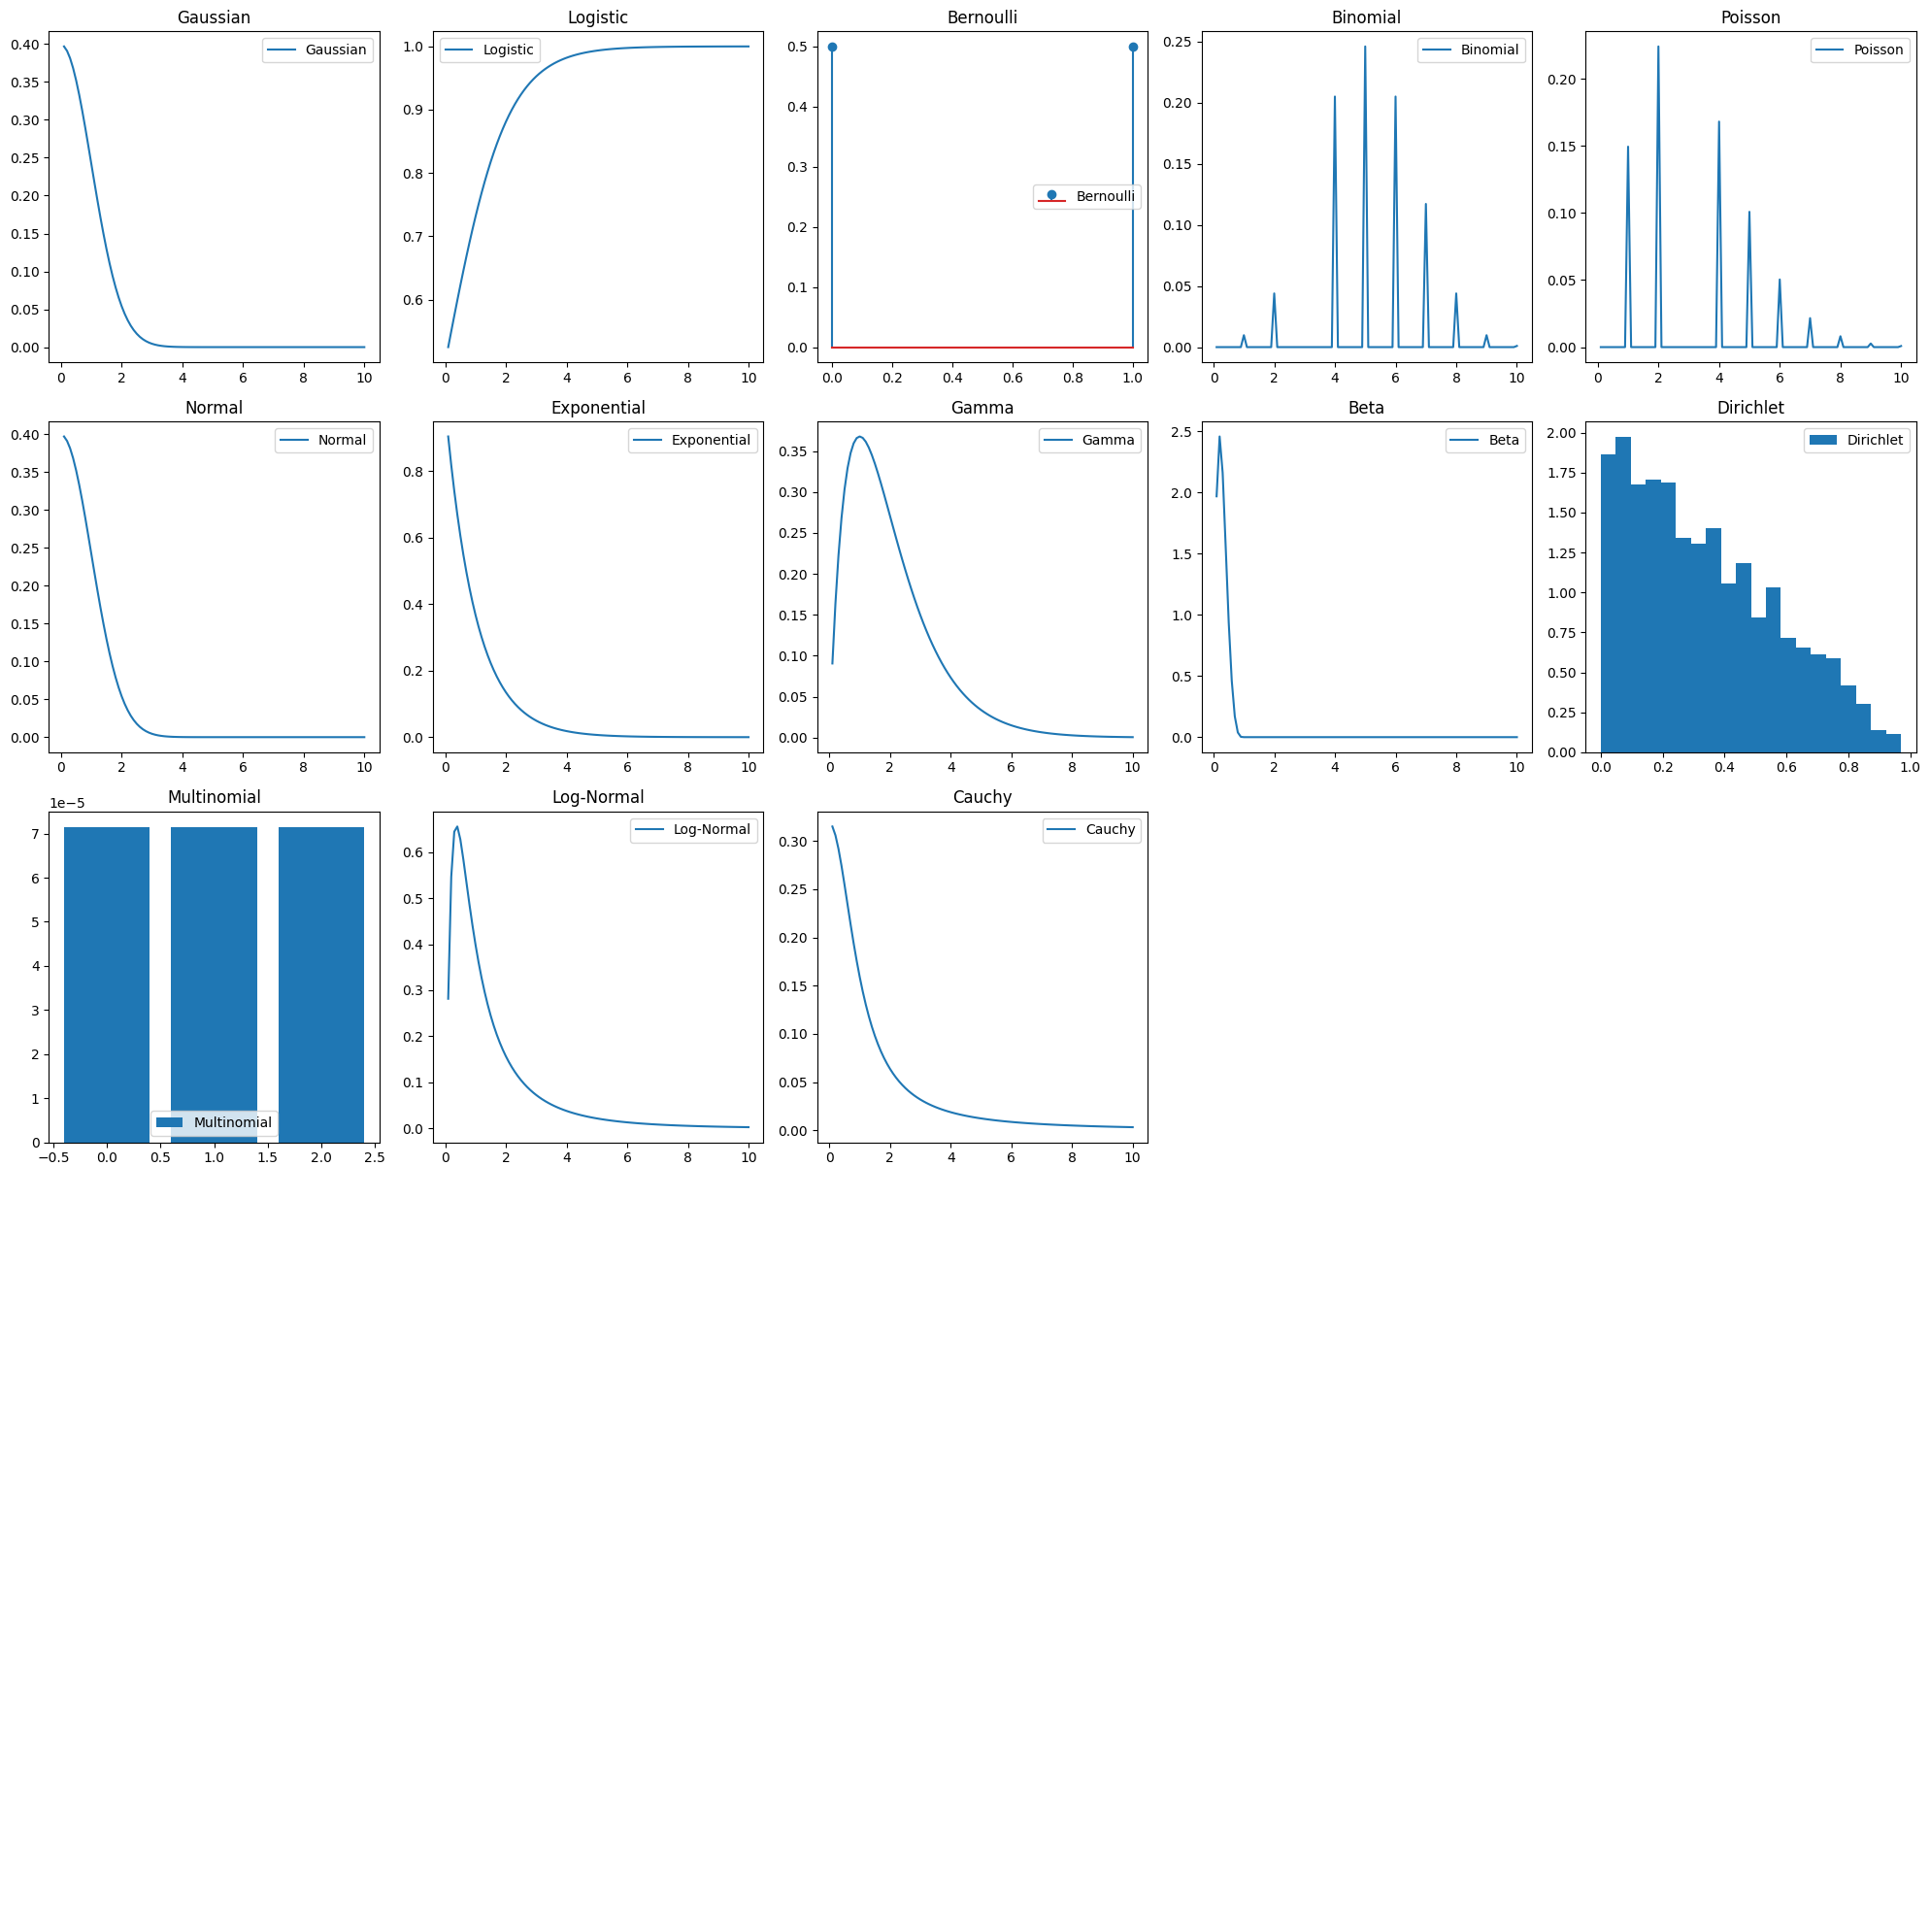

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson as scipy_poisson, norm, expon, gamma, beta as scipy_beta, dirichlet, multinomial, lognorm, cauchy

# Probability Functions

def gaussian(x, sigma=1):
    """ Gaussian function (normal distribution) """
    return np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

def logistic(x):
    """ Logistic function (sigmoid) """
    return 1 / (1 + np.exp(-x))

def bernoulli(x, phi):
    """ Bernoulli distribution """
    return phi**x * (1 - phi)**(1 - x)

def binomial(x, n, p):
    """ Binomial distribution """
    return binom.pmf(x, n, p)

def poisson_func(x, lambd):
    """ Poisson distribution """
    return scipy_poisson.pmf(x, lambd)

def normal(x, mu=0, sigma=1):
    """ Normal (Gaussian) distribution """
    return norm.pdf(x, mu, sigma)

def exponential(x, lambd=1):
    """ Exponential distribution """
    return expon.pdf(x, scale=1/lambd)

def gamma_dist(x, alpha, beta):
    """ Gamma distribution """
    return gamma.pdf(x, alpha, scale=beta)

def beta_distribution(x, alpha, beta):
    """ Beta distribution """
    return scipy_beta.pdf(x, alpha, beta)

def dirichlet_dist(x, alpha):
    """ Dirichlet distribution (approximated via samples) """
    return np.histogram(x, bins=20, density=True)[0]

def multinomial_dist(x, n, p):
    """ Multinomial distribution (approximated via pmf) """
    return multinomial.pmf(x, n, p)

def log_normal(x, mu=0, sigma=1):
    """ Log-Normal distribution """
    return lognorm.pdf(x, sigma, scale=np.exp(mu))

def cauchy_dist(x, x0=0, gamma=1):
    """ Cauchy distribution """
    return cauchy.pdf(x, x0, gamma)

# Setup for plotting
x = np.linspace(0.1, 10, 100)  # Range for continuous functions
x_bernoulli = np.array([0, 1])  # For Bernoulli, x will just be 0 or 1
x_dirichlet = np.random.dirichlet(np.ones(3), 1000)  # Random Dirichlet samples (for visualization)
x_multinomial = [10, 20, 30]  # Example values for multinomial distribution
functions = [gaussian, logistic, bernoulli, binomial, poisson_func, normal, exponential, gamma_dist, beta_distribution, dirichlet_dist,
             multinomial_dist, log_normal, cauchy_dist]
function_names = ['Gaussian', 'Logistic', 'Bernoulli', 'Binomial', 'Poisson', 'Normal', 'Exponential', 'Gamma', 'Beta',
                  'Dirichlet', 'Multinomial', 'Log-Normal', 'Cauchy']

# Create a 5x5 grid for comparison
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# Plot each probability function
for i, ax in enumerate(axes.flat):
    if i < len(functions):  # Only plot the functions we have
        if function_names[i] == 'Bernoulli':
            ax.stem(x_bernoulli, bernoulli(x_bernoulli, phi=0.5), label=function_names[i])  # Bernoulli is discrete
        elif function_names[i] == 'Binomial':
            ax.plot(x, binomial(x, n=10, p=0.5), label=function_names[i])  # Binomial
        elif function_names[i] == 'Poisson':
            ax.plot(x, poisson_func(x, lambd=3), label=function_names[i])  # Poisson
        elif function_names[i] == 'Dirichlet':
            ax.hist(x_dirichlet.flatten(), bins=20, density=True, label=function_names[i])  # Dirichlet
        elif function_names[i] == 'Multinomial':
            ax.bar([0, 1, 2], multinomial_dist(x_multinomial, n=60, p=[0.2, 0.5, 0.3]), label=function_names[i])  # Multinomial
        elif function_names[i] == 'Log-Normal':
            ax.plot(x, log_normal(x), label=function_names[i])  # Log-Normal
        elif function_names[i] == 'Cauchy':
            ax.plot(x, cauchy_dist(x), label=function_names[i])  # Cauchy
        elif function_names[i] == 'Exponential':
            ax.plot(x, exponential(x, lambd=1), label=function_names[i])  # Exponential
        elif function_names[i] == 'Gamma':
            ax.plot(x, gamma_dist(x, alpha=2, beta=1), label=function_names[i])  # Gamma
        elif function_names[i] == 'Beta':
            ax.plot(x, beta_distribution(x, alpha=2, beta=5), label=function_names[i])  # Beta
        else:
            ax.plot(x, functions[i](x), label=function_names[i])  # All other functions (continuous)

        ax.set_title(function_names[i])
        ax.legend()

# Hide any empty subplots (if fewer than 25 functions)
for i in range(len(functions), 25):
    axes.flat[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 3.11 Bayes’ Rule

Bayes' Rule is a fundamental concept in probability theory that allows us to compute the reverse of a conditional probability. In situations where we know $P(y | x)$, but need to compute $P(x | y)$, Bayes' Rule provides a way to compute the desired probability, given that we also know $P(x)$.

The rule is expressed as:

$$
P(x | y) = \frac{P(x) P(y | x)}{P(y)}
$$

Where:
- $P(x | y)$ is the posterior probability, which is what we are trying to find.
- $P(x)$ is the prior probability of $x$.
- $P(y | x)$ is the likelihood, i.e., the probability of $y$ given $x$.
- $P(y)$ is the marginal likelihood, or the probability of $y$, which can be computed as $$P(y) = \sum_x P(y | x) P(x)$$.

### Explanation:
- **$P(x | y)$**: The probability of $x$ given $y$, which we want to find.
- **$P(y | x)$**: The probability of $y$ given $x$, which is usually known or can be derived from the data.
- **$P(x)$**: The prior probability of $x$, which is typically known or assumed.
- **$P(y)$**: The evidence or marginal likelihood, which ensures the posterior probabilities sum to 1.

Bayes' Rule is derived from the definition of conditional probability and is named after Reverend Thomas Bayes, who first discovered a special case of the formula. The general version of the formula was independently discovered by Pierre-Simon Laplace.

In practice, while the term $P(y)$ appears in the formula, it can be computed as:

$$
P(y) = \sum_x P(y | x) P(x)
$$

This means we don't need to start with the knowledge of $P(y)$, and it can often be computed using the other terms.


In [90]:
import numpy as np

# Define the functions for Bayes' Rule components

def bayes_rule(prior, likelihood, evidence):
    """
    Implement Bayes' Rule: P(x | y) = (P(x) * P(y | x)) / P(y)
    prior: P(x)
    likelihood: P(y | x)
    evidence: P(y)
    """
    posterior = (prior * likelihood) / evidence
    return posterior

# Example values
# Let's consider an example where:
# P(x) = Prior probability of x (e.g., the probability of a person being sick)
prior = 0.01  # 1% chance of being sick

# P(y | x) = Likelihood (e.g., the probability of a positive test given the person is sick)
likelihood = 0.9  # 90% chance of a positive test if the person is sick

# P(y) = Evidence (e.g., the overall probability of a positive test)
evidence = 0.05  # 5% chance of a positive test (even if the person is healthy)

# Calculate posterior using Bayes' Rule
posterior = bayes_rule(prior, likelihood, evidence)

# Output the result
print(f"The posterior probability P(x | y) is: {posterior:.4f}")


The posterior probability P(x | y) is: 0.1800


## 3.12 Technical Details of Continuous Variables

A formal understanding of continuous random variables and probability density functions requires the use of **measure theory**. This is a branch of mathematics that goes beyond the scope of this book, but we will briefly discuss the key concepts.

### Measure Theory and Probability
In Section 3.3.2, we discussed the probability of a continuous vector-valued $x$ lying in a set $S$, which is given by the integral of $p(x)$ over the set $S$. However, some sets can lead to paradoxes. For example, it is possible to construct two sets $S_1$ and $S_2$ such that:

$$ P(x \in S_1) + P(x \in S_2) > 1 \quad \text{but} \quad S_1 \cap S_2 = \emptyset $$

These paradoxes arise from the infinite precision of real numbers and the use of fractal-shaped sets or sets defined by transforming rational numbers. Measure theory resolves this by providing a way to describe sets for which probability can be computed without paradoxes.

For our purposes, we integrate over relatively simple sets and do not encounter these paradoxes.

### Measure Zero and Almost Everywhere
A key concept in measure theory is that a set of points may have **measure zero**, meaning it occupies no volume in the space we are measuring. For example:
- In $\mathbb{R}^2$, a line has measure zero, while a filled polygon has positive measure.
- An individual point has measure zero.

Any union of countably many sets, each with measure zero, also has measure zero. For instance, the set of all rational numbers has measure zero.

A property that holds **almost everywhere** holds for all points except those in a set of measure zero. These exceptions occupy negligible space and can be ignored for most applications.

### Transformations of Continuous Random Variables
Consider two random variables, $x$ and $y$, where $y = g(x)$ and $g$ is an invertible, continuous, differentiable transformation. One might expect that:

$$ p_y(y) = p_x(g^{-1}(y)) $$

However, this is not the case. Let's consider a simple example:

Suppose $x \sim U(0, 1)$, and let $y = x^2$. If we incorrectly apply the rule $p_y(y) = p_x(2y)$, we get $p_y(y) = 0$ everywhere except for the interval $[0, \frac{1}{2}]$, and it will be $1$ on this interval. This results in:

$$ \int p_y(y) \, dy = \frac{1}{2} $$

This violates the definition of a probability distribution.

### Correcting the Transformation Formula
The error occurs because the space is distorted by the function $g$. The probability of $x$ lying in an infinitesimally small region with volume $\delta x$ is given by $p(x) \delta x$. Since $g$ can expand or contract space, the infinitesimal volume surrounding $x$ in the $x$ space may have a different volume in the $y$ space.

To correct this, we need to preserve the property:

$$ |p_y(g(x)) dy| = |p_x(x) dx| $$

Solving for this, we get the correct formula for the transformed probability density:

$$ p_y(y) = p_x(g^{-1}(y)) \left| \frac{\partial x}{\partial y} \right| $$

Alternatively, for the inverse transformation, we have:

$$ p_x(x) = p_y(g(x)) \left| \frac{\partial g(x)}{\partial x} \right| $$

In higher dimensions, this derivative generalizes to the **Jacobian matrix**, where:

$$ p_x(x) = p_y(g(x)) \left| \text{det} \left( \frac{\partial g(x)}{\partial x} \right) \right| $$

Thus, for real-valued vectors $x$ and $y$, the probability density function transforms as:

$$ p_x(x) = p_y(g(x)) \left| \text{det} \left( \frac{\partial g(x)}{\partial x} \right) \right| $$

This formula ensures that the transformation is correctly accounted for when dealing with continuous random variables.



<ipython-input-91-c4e436a62da8>:20: RuntimeWarning: divide by zero encountered in divide
  return p_x(g_inv(y)) * (1 / (2 * np.sqrt(y)))


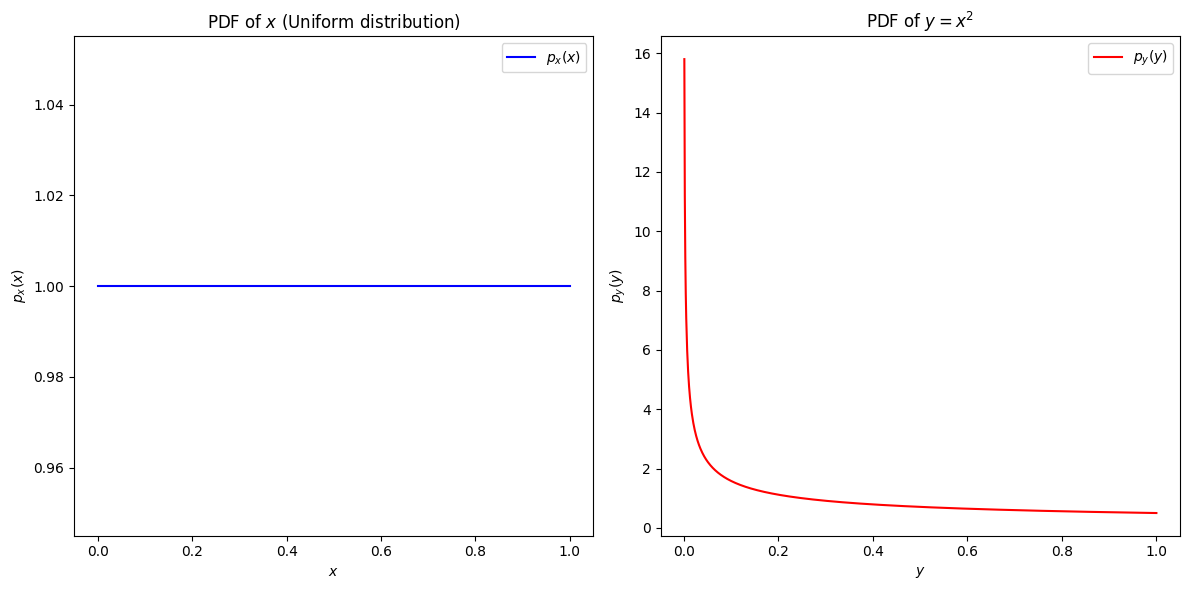

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Define the transformation function and its inverse
def g(x):
    return x**2

def g_inv(y):
    return np.sqrt(y)

# Probability density function for the original variable x (Uniform distribution)
def p_x(x):
    return uniform.pdf(x, 0, 1)  # Uniform distribution U(0, 1)

# Probability density function for the transformed variable y using the formula
def p_y(y):
    # The derivative of the inverse function g_inv(y) = sqrt(y) is 1 / (2 * sqrt(y))
    # Apply the transformation formula: p_y(y) = p_x(g_inv(y)) * |dg_inv/dy|
    return p_x(g_inv(y)) * (1 / (2 * np.sqrt(y)))

# Generate values for x and y
x_vals = np.linspace(0, 1, 1000)  # Values of x in U(0, 1)
y_vals = g(x_vals)  # Corresponding values of y = x^2

# Plot p_x(x) and p_y(y)
x_vals_pdf = np.linspace(0, 1, 1000)
y_vals_pdf = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot p_x(x) on the left
ax[0].plot(x_vals_pdf, p_x(x_vals_pdf), label='$p_x(x)$', color='blue')
ax[0].set_title('PDF of $x$ (Uniform distribution)')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$p_x(x)$')
ax[0].legend()

# Plot p_y(y) on the right
ax[1].plot(y_vals_pdf, p_y(y_vals_pdf), label='$p_y(y)$', color='red')
ax[1].set_title('PDF of $y = x^2$')
ax[1].set_xlabel('$y$')
ax[1].set_ylabel('$p_y(y)$')
ax[1].legend()

plt.tight_layout()
plt.show()


# 3.13 Information Theory

Information theory is a branch of applied mathematics that revolves around quantifying how much information is present in a signal. It was originally invented to study sending messages from discrete alphabets over a noisy channel, such as communication via radio transmission. In this context, information theory tells how to design optimal codes and calculate the expected length of messages sampled from specific probability distributions using various encoding schemes.

In the context of machine learning, we can also apply information theory to continuous variables where some of these message length interpretations do not apply. This field is fundamental to many areas of electrical engineering and computer science. In this lecture, we mostly use a few key ideas from information theory to characterize probability distributions or quantify similarity between probability distributions.

The basic intuition behind information theory is that learning that an unlikely event has occurred is more informative than learning that a likely event has occurred. A message saying “the sun rose this morning” is so uninformative as to be unnecessary to send, but a message saying “there was a solar eclipse this morning” is very informative.

We would like to quantify information in a way that formalizes this intuition. Specifically:

- Likely events should have low information content, and in the extreme case, events that are guaranteed to happen should have no information content whatsoever.
- Less likely events should have higher information content.
- Independent events should have additive information. For example, finding out that a tossed coin has come up heads twice should convey twice as much information as finding out that a tossed coin has come up heads once.

In order to satisfy all three of these properties, we define the self-information of an event $x = x$ to be:

$$
I(x) = - \log P(x) \tag{3.48}
$$

In this lecture, we use the natural logarithm, with base $e$. Our definition of $I(x)$ is therefore written in units of *nats*. One *nat* is the amount of information gained by observing an event with probability $\frac{1}{e}$. Other texts use base-2 logarithms and units called *bits* or *shannons*; information measured in bits is just a rescaling of information measured in nats.

When $x$ is continuous, we use the same definition of information by analogy, but some of the properties from the discrete case are lost. For example, an event with unit density still has zero information, despite not being an event that is guaranteed to occur.

Self-information deals only with a single outcome. We can quantify the amount of uncertainty in an entire probability distribution using the Shannon entropy:

$$
H(x) = \mathbb{E}_{x \sim P} [I(x)] = -\mathbb{E}_{x \sim P} [\log P(x)] \tag{3.49}
$$

also denoted $H(P)$. In other words, the Shannon entropy of a distribution is the expected amount of information in an event drawn from that distribution. It gives a lower bound on the number of bits (if the logarithm is base 2, otherwise the units are different) needed on average to encode symbols drawn from a distribution $P$. Distributions that are nearly deterministic (where the outcome is nearly certain) have low entropy; distributions that are closer to uniform have high entropy.

When $x$ is continuous, the Shannon entropy is known as the **differential entropy**.

If we have two separate probability distributions $P(x)$ and $Q(x)$ over the same random variable $x$, we can measure how different these two distributions are using the Kullback-Leibler (KL) divergence:

$$
D_{KL}(P \parallel Q) = \mathbb{E}_{x \sim P} \left[ \log \frac{P(x)}{Q(x)} \right] = \mathbb{E}_{x \sim P} [\log P(x) - \log Q(x)] \tag{3.50}
$$

In the case of discrete variables, it is the extra amount of information (measured in bits if we use the base-2 logarithm, but in machine learning we usually use nats and the natural logarithm) needed to send a message containing symbols drawn from probability distribution $P$, when we use a code that was designed to minimize the length of messages drawn from probability distribution $Q$.

The KL divergence has many useful properties, most notably that it is non-negative. The KL divergence is 0 if and only if $P$ and $Q$ are the same distribution in the case of discrete variables, or equal "almost everywhere" in the case of continuous variables. Because the KL divergence is non-negative and measures the difference between two distributions, it is often conceptualized as measuring some sort of distance between these distributions. However, it is not a true distance measure because it is not symmetric:

$$
D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P)
$$

for some $P$ and $Q$. This asymmetry means that there are important consequences to the choice of whether to use $D_{KL}(P \parallel Q)$ or $D_{KL}(Q \parallel P)$.

A quantity that is closely related to the KL divergence is the **cross-entropy**:

$$
H(P, Q) = H(P) + D_{KL}(P \parallel Q)
$$

which is similar to the KL divergence but lacking the term on the left:

$$
H(P, Q) = -\mathbb{E}_{x \sim P} \log Q(x) \tag{3.51}
$$

Minimizing the cross-entropy with respect to $Q$ is equivalent to minimizing the KL divergence, because $Q$ does not participate in the omitted term.

When computing many of these quantities, it is common to encounter expressions of the form $0 \log 0$. By convention, in the context of information theory, we treat these expressions as:

$$
\lim_{x \to 0} x \log x = 0
$$


In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate self-information
def self_information(prob):
    """ Calculate the self-information I(x) = -log(P(x)) """
    return -np.log(prob)

# Function to calculate Shannon entropy for a discrete distribution
def shannon_entropy(p):
    """ Calculate the Shannon entropy H(x) = -sum(P(x) * log(P(x))) """
    return -np.sum(p * np.log(p))

# Function to calculate Kullback-Leibler (KL) Divergence
def kl_divergence(p, q):
    """ Calculate the Kullback-Leibler divergence DKL(P||Q) """
    return np.sum(p * np.log(p / q))

# Function to calculate Cross-entropy
def cross_entropy(p, q):
    """ Calculate the cross-entropy H(P, Q) = -sum(P(x) * log(Q(x))) """
    return -np.sum(p * np.log(q))

# Function to compute continuous differential entropy (for a normal distribution)
def differential_entropy(mu, sigma):
    """ Calculate the differential entropy for a normal distribution """
    return 0.5 * np.log(2 * np.pi * np.e * sigma**2)

# Example Usage

# Discrete Probability Distribution
p = np.array([0.1, 0.2, 0.3, 0.4])

# Self-Information for each event in p
I = self_information(p)
print(f"Self-Information for each event: {I}")

# Shannon Entropy of the distribution p
H = shannon_entropy(p)
print(f"Shannon Entropy: {H}")

# Another distribution q (for KL Divergence)
q = np.array([0.2, 0.2, 0.3, 0.3])

# KL Divergence between p and q
kl = kl_divergence(p, q)
print(f"KL Divergence: {kl}")

# Cross-Entropy between p and q
cross_ent = cross_entropy(p, q)
print(f"Cross-Entropy: {cross_ent}")

# Continuous Example: Differential Entropy for a Normal Distribution (mu=0, sigma=1)
mu, sigma = 0, 1
differential_H = differential_entropy(mu, sigma)
print(f"Differential Entropy (Normal Distribution): {differential_H}")


Self-Information for each event: [2.30258509 1.60943791 1.2039728  0.91629073]
Shannon Entropy: 1.2798542258336676
KL Divergence: 0.04575811092471789
Cross-Entropy: 1.3256123367583854
Differential Entropy (Normal Distribution): 1.4189385332046727


### Interpretation of Information Theory Metrics

- **Self-Information for each event**:  
  These values represent the information content of each outcome in a discrete distribution. Larger values correspond to less probable events, indicating higher information gain.

- **Shannon Entropy**:  
  This quantifies the average uncertainty in the distribution. A value of 1.28 nats suggests a moderate level of uncertainty in the distribution, where the outcomes are not entirely predictable but still contain some regularity.

- **KL Divergence**:  
  The value of 0.0457 indicates a small difference between the two distributions being compared. In practical terms, it shows that the two distributions are relatively similar, but some divergence still exists.

- **Cross-Entropy**:  
  This value (1.3256) reflects the average number of nats required to encode data from distribution Q when the true distribution is P. A higher value than the Shannon Entropy indicates inefficiency in encoding.

- **Differential Entropy (Normal Distribution)**:  
  The value of 1.4189 quantifies the uncertainty of a continuous distribution, specifically for the normal distribution in this case. This is higher than the Shannon Entropy, as it applies to a continuous rather than discrete set of outcomes.


### 3.14 Structured Probabilistic Models

- **Introduction**:  
  In machine learning, we often work with probability distributions over a large number of random variables. These distributions usually have direct interactions between a relatively small number of variables. Using a single function to describe the entire joint probability distribution can be inefficient, both computationally and statistically.

- **KL Divergence**:  
  The KL divergence is asymmetric. Given two distributions $p(x)$ and $q(x)$, we can minimize either $D_{KL}(p \parallel q)$ or $D_{KL}(q \parallel p)$, depending on the problem at hand.

  - Minimizing $D_{KL}(p \parallel q)$: Select $q$ that has high probability where $p$ has high probability. If $p$ has multiple modes, $q$ tends to blur these modes together.
  - Minimizing $D_{KL}(q \parallel p)$: Select $q$ that has low probability where $p$ has low probability. If $p$ has multiple modes that are sufficiently separated, $q$ will pick a single mode to minimize divergence.

- **Factorization of Distributions**:  
  Rather than using a single function for the entire distribution, we can factorize it into smaller parts. For example, for three random variables $a$, $b$, and $c$, where:
  - $a$ influences $b$,
  - $b$ influences $c$,
  - $a$ and $c$ are independent given $b$,
  
  The joint probability distribution can be written as:
  $$
  p(a, b, c) = p(a) p(b | a) p(c | b)
  $$
  This factorization reduces the number of parameters required to describe the distribution.

- **Graphical Models**:  
  These factorizations can be represented using graphs. In this context, the graph is a set of vertices (random variables) connected by edges (representing interactions).

  - **Directed Graphical Models**:  
    Directed models use directed edges to represent conditional dependencies. The distribution is factored as:
    $$
    p(x) = \prod_{i} p(x_i | \text{Pa}_G(x_i))
    $$
    Where $\text{Pa}_G(x_i)$ denotes the parents of the variable $x_i$.

    Example:  
    For random variables $a$, $b$, $c$, $d$, and $e$, the directed model is:
    $$
    p(a, b, c, d, e) = p(a) p(b | a) p(c | a, b) p(d | b) p(e | c)
    $$

  - **Undirected Graphical Models**:  
    In undirected models, edges represent direct interactions without implying direction. The distribution is factored into functions $\phi(i)(C(i))$, where each factor corresponds to a clique of variables. The probability is:
    $$
    p(x) = \frac{1}{Z} \prod_{i} \phi(i)(C(i))
    $$
    Where $Z$ is a normalization constant.

    Example:  
    For random variables $a$, $b$, $c$, $d$, and $e$, the undirected model is:
    $$
    p(a, b, c, d, e) = \frac{1}{Z} \phi(1)(a, b, c) \phi(2)(b, d) \phi(3)(c, e)
    $$

- **Key Points**:
  - Directed and undirected models represent the same underlying probability distribution in different ways.
  - Directed models focus on causal relationships (conditional dependencies).
  - Undirected models capture correlations between variables without directionality.



#####a) Directed Graphical Model

P(Accident=True | Rain=True, Traffic=True) = 0.97
P(Accident=False | Rain=True, Traffic=True) = 0.03


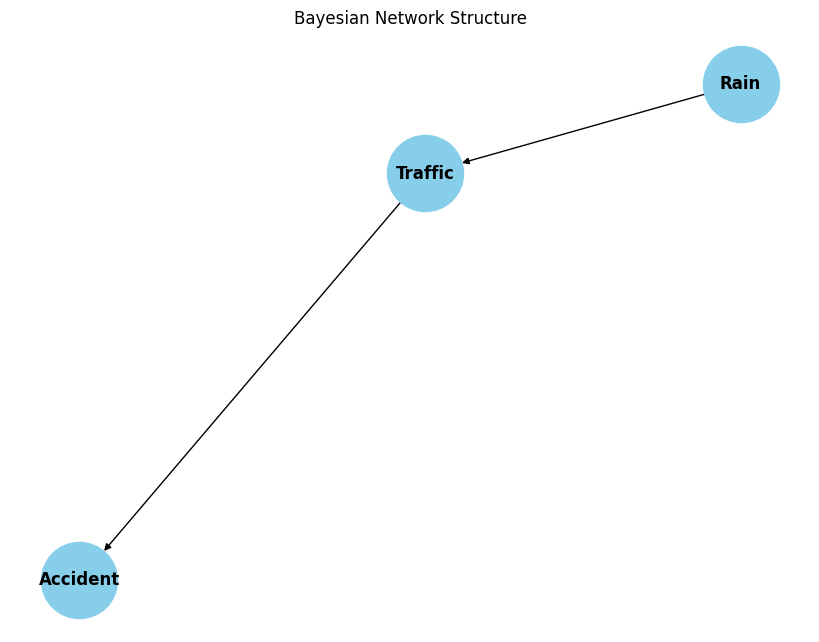


Conditional Probability Distributions (CPDs):

P(Rain):
[0.7 0.3]

P(Traffic | Rain):
{'True': array([0.8, 0.2]), 'False': array([0.4, 0.6])}

P(Accident | Traffic):
{'True': array([0.9, 0.1]), 'False': array([0.2, 0.8])}


In [93]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the structure of the Bayesian Network using networkx
# Nodes: Rain, Traffic, Accident
model = nx.DiGraph()
model.add_edges_from([('Rain', 'Traffic'), ('Traffic', 'Accident')])

# Step 2: Define the Conditional Probability Distributions (CPDs)

# Define CPD for 'Rain' (Prior probabilities)
cpd_rain = np.array([0.7, 0.3])  # P(Rain=False) = 0.7, P(Rain=True) = 0.3

# Define CPD for 'Traffic' given 'Rain'
# Traffic depends on Rain: P(Traffic | Rain)
cpd_traffic_given_rain = {
    'True': np.array([0.8, 0.2]),  # If Rain=True: P(Traffic=True)=0.8, P(Traffic=False)=0.2
    'False': np.array([0.4, 0.6])  # If Rain=False: P(Traffic=True)=0.4, P(Traffic=False)=0.6
}

# Define CPD for 'Accident' given 'Traffic'
# Accident depends on Traffic: P(Accident | Traffic)
cpd_accident_given_traffic = {
    'True': np.array([0.9, 0.1]),   # If Traffic=True: P(Accident=True)=0.9, P(Accident=False)=0.1
    'False': np.array([0.2, 0.8])   # If Traffic=False: P(Accident=True)=0.2, P(Accident=False)=0.8
}

# Step 3: Perform inference manually
def infer_accident(rain, traffic):
    # Given Rain and Traffic, infer the probability of Accident
    traffic_cpd = cpd_traffic_given_rain['True'] if rain else cpd_traffic_given_rain['False']
    accident_cpd = cpd_accident_given_traffic['True'] if traffic else cpd_accident_given_traffic['False']

    # P(Accident | Rain, Traffic) = P(Accident | Traffic) * P(Traffic | Rain)
    prob_accident_true = accident_cpd[0] * traffic_cpd[0]
    prob_accident_false = accident_cpd[1] * traffic_cpd[1]

    # Normalize to ensure total probability sums to 1
    total_prob = prob_accident_true + prob_accident_false
    prob_accident_true /= total_prob
    prob_accident_false /= total_prob

    return prob_accident_true, prob_accident_false

# Example Query: What is the probability of an accident given that it is raining and there is traffic?
rain = True  # It is raining
traffic = True  # There is traffic

prob_accident_true, prob_accident_false = infer_accident(rain, traffic)
print(f"P(Accident=True | Rain={rain}, Traffic={traffic}) = {prob_accident_true:.2f}")
print(f"P(Accident=False | Rain={rain}, Traffic={traffic}) = {prob_accident_false:.2f}")

# Step 4: Visualization of the Bayesian Network structure
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(model)  # Position the nodes using a spring layout
nx.draw(model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight='bold', arrows=True)
plt.title("Bayesian Network Structure")
plt.show()

# Step 5: Display CPDs as a table for visualization
print("\nConditional Probability Distributions (CPDs):")
print("\nP(Rain):")
print(cpd_rain)

print("\nP(Traffic | Rain):")
print(cpd_traffic_given_rain)

print("\nP(Accident | Traffic):")
print(cpd_accident_given_traffic)


#####b)Undirected Graphical Model Example (Markov Random Field)

P(Z | X = 1) = [0.47000742 0.52999258]


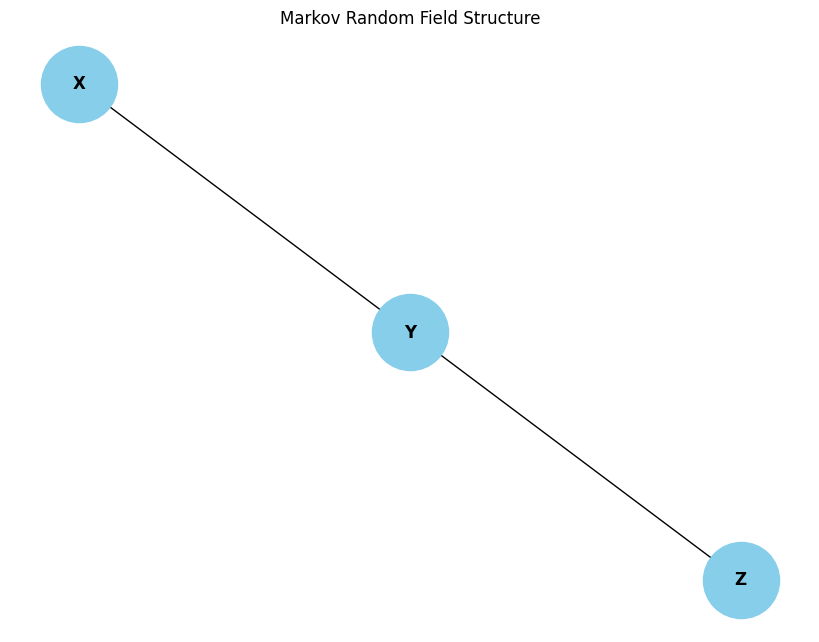


Factor Functions for the Cliques:

Factor for {X, Y}:
P(X, Y) ~ exp(-0.5 * (X - Y)^2)

Factor for {Y, Z}:
P(Y, Z) ~ exp(-0.5 * (Y - Z)^2)


In [94]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the structure of the Markov Random Field using networkx
# Nodes: X, Y, Z
model = nx.Graph()  # Undirected graph for MRF
model.add_edges_from([('X', 'Y'), ('Y', 'Z')])

# Step 2: Define the factor functions for the cliques
# Here we are using simple binary variables, so let's define the factor functions over cliques

# Define a factor for the clique {X, Y} (P(X, Y))
def factor_XY(x, y):
    # Just a simple factor, you can define it based on your problem
    return np.exp(-0.5 * (x - y)**2)

# Define a factor for the clique {Y, Z} (P(Y, Z))
def factor_YZ(y, z):
    # Another simple factor
    return np.exp(-0.5 * (y - z)**2)

# Step 3: Compute the joint probability (not normalized)
def joint_probability(x, y, z):
    # The joint probability is the product of the factors over the cliques
    return factor_XY(x, y) * factor_YZ(y, z)

# Step 4: Perform inference manually (e.g., compute the probability of Z given X)
def infer_z_given_x(x, y_values=[0, 1], z_values=[0, 1]):
    # We sum over all possible values of Y and Z to compute the marginal probability of Z
    prob_z_given_x = np.zeros(len(z_values))
    for i, z in enumerate(z_values):
        prob_z_given_x[i] = sum(joint_probability(x, y, z) for y in y_values)

    # Normalize to get the probability distribution
    total_prob = sum(prob_z_given_x)
    prob_z_given_x /= total_prob

    return prob_z_given_x

# Example query: P(Z | X = 1)
x = 1  # X = 1
prob_z_given_x = infer_z_given_x(x)
print(f"P(Z | X = {x}) = {prob_z_given_x}")

# Step 5: Visualization of the Markov Random Field structure
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(model)  # Position the nodes using a spring layout
nx.draw(model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=12, font_weight='bold')
plt.title("Markov Random Field Structure")
plt.show()

# Step 6: Display factors (just for visualization)
print("\nFactor Functions for the Cliques:")
print("\nFactor for {X, Y}:")
print("P(X, Y) ~ exp(-0.5 * (X - Y)^2)")

print("\nFactor for {Y, Z}:")
print("P(Y, Z) ~ exp(-0.5 * (Y - Z)^2)")


#####c) KL Divergence Calculation Example

KL Divergence DKL(p || q): 0.020135513550688877
KL Divergence DKL(q || p): 0.020410997260127517


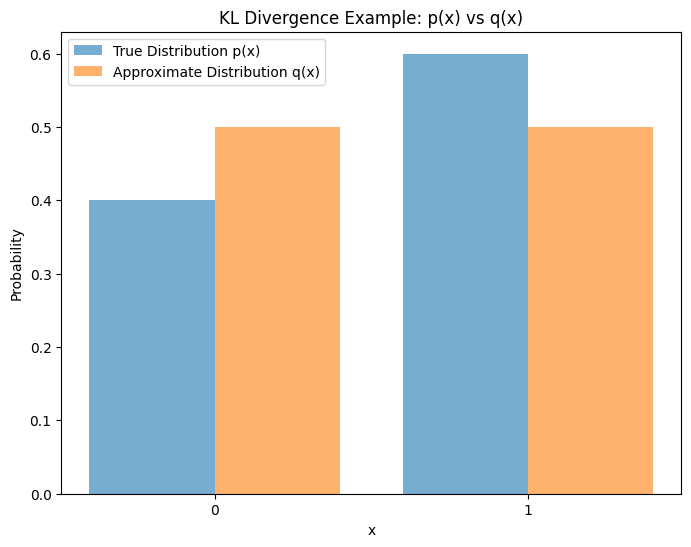

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import kl_div

# Example distributions p and q (simple probabilities for demonstration)
p = np.array([0.4, 0.6])
q = np.array([0.5, 0.5])

# Compute KL divergence DKL(p || q)
kl_div_pq = np.sum(kl_div(p, q))
print(f"KL Divergence DKL(p || q): {kl_div_pq}")

# Compute KL divergence DKL(q || p)
kl_div_qp = np.sum(kl_div(q, p))
print(f"KL Divergence DKL(q || p): {kl_div_qp}")

# Step 1: Visualization
x_values = np.array([0, 1])  # Values for x (discrete random variable)

# Create bar plots for p and q
plt.figure(figsize=(8, 6))

# Plot p(x) and q(x)
plt.bar(x_values - 0.2, p, width=0.4, label='True Distribution p(x)', alpha=0.6)
plt.bar(x_values + 0.2, q, width=0.4, label='Approximate Distribution q(x)', alpha=0.6)

# Customize the plot
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('KL Divergence Example: p(x) vs q(x)')
plt.xticks(x_values)
plt.legend()
plt.show()
